# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import glob
warnings.filterwarnings("ignore")

# Import Dataset

In [2]:
! pip install xlsx2csv

In [3]:
from xlsx2csv import Xlsx2csv
from io import StringIO
import pandas as pd

def read_excel(path: str) -> pd.DataFrame:
    buffer = StringIO()
    Xlsx2csv(path, outputencoding="utf-8", sheet_name="Sheet1").convert(buffer)
    buffer.seek(0)
    df = pd.read_csv(buffer)
    return df

dfs = []  # List to store the DataFrames

for i in range(5):
    file_path = f"DATASET/DM20152020_fkrti_{i}.xlsx"
    df_part = read_excel(file_path)
    dfs.append(df_part)

df = pd.concat(dfs, ignore_index=True)


In [4]:
print("Rows : "+ str(df.shape[0]))
print("Column : "+str(df.shape[1]))

Rows : 500000
Column : 56


# Exploratory Data Analysis

## Data Description

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 56 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  500000 non-null  int64  
 1   PSTV01      500000 non-null  int64  
 2   PSTV02      500000 non-null  int64  
 3   PSTV15      500000 non-null  float64
 4   FKP02       153357 non-null  object 
 5   FKL02       500000 non-null  object 
 6   FKL03       500000 non-null  object 
 7   FKL04       500000 non-null  object 
 8   FKL05       500000 non-null  object 
 9   FKL06       500000 non-null  object 
 10  FKL07       500000 non-null  object 
 11  FKL08       500000 non-null  object 
 12  FKL09       500000 non-null  object 
 13  FKL10       500000 non-null  object 
 14  FKL11       499991 non-null  object 
 15  FKL12       500000 non-null  object 
 16  FKL13       500000 non-null  object 
 17  FKL14       500000 non-null  object 
 18  FKL15       500000 non-null  object 
 19  FK

In [6]:
df.isna().sum()

Unnamed: 0         0
PSTV01             0
PSTV02             0
PSTV15             0
FKP02         346643
FKL02              0
FKL03              0
FKL04              0
FKL05              0
FKL06              0
FKL07              0
FKL08              0
FKL09              0
FKL10              0
FKL11              9
FKL12              0
FKL13              0
FKL14              0
FKL15              0
FKL15A         27921
FKL16          27921
FKL16A         27921
FKL17            464
FKL17A           464
FKL18            464
FKL18A           464
FKL19              0
FKL19A             0
FKL20              0
FKL21              0
FKL22              0
FKL23              0
FKL25              0
FKL26              0
FKL27              0
FKL28              0
FKL29              0
FKL30         278252
FKL31              0
FKL32              0
FKL33         499994
FKL34          62837
FKL35         487576
FKL36         487586
FKL37          62837
FKL38         499995
FKL39         499993
FKL40        

In [7]:
df.nunique()

Unnamed: 0    500000
PSTV01        109863
PSTV02        109496
PSTV15         80720
FKP02         125049
FKL02         500000
FKL03           2192
FKL04           2206
FKL05             34
FKL06            483
FKL07              9
FKL08              2
FKL09             27
FKL10              2
FKL11             86
FKL12              5
FKL13              3
FKL14              5
FKL15           1395
FKL15A          1394
FKL16           5111
FKL16A          5194
FKL17            512
FKL17A           512
FKL18           1770
FKL18A          2068
FKL19            567
FKL19A           739
FKL20             21
FKL21              6
FKL22             50
FKL23              4
FKL25             36
FKL26            502
FKL27             10
FKL28             14
FKL29             45
FKL30          34530
FKL31              5
FKL32          12453
FKL33              4
FKL34              7
FKL35             11
FKL36             12
FKL37             95
FKL38              2
FKL39              2
FKL40        

## Convert Arrival and Departure Time in to DateTime

In [8]:
print(df['FKL03'].head(1))
print(df['FKL04'].head(1))

0    2017-09-05 00:00:00
Name: FKL03, dtype: object
0    2017-09-05 00:00:00
Name: FKL04, dtype: object


In [9]:

df['FKL03'] = pd.to_datetime(df['FKL03'], format='%Y-%m-%d %H:%M:%S')
df['FKL04'] = pd.to_datetime(df['FKL04'], format='%Y-%m-%d %H:%M:%S')


In [10]:
df['hour_spent'] = (df['FKL04'] - df['FKL03']).dt.total_seconds() / 3600
df['hour_spent']

0           0.0
1           0.0
2          72.0
3           0.0
4           0.0
          ...  
499995      0.0
499996      0.0
499997      0.0
499998      0.0
499999    120.0
Name: hour_spent, Length: 500000, dtype: float64

## Kedatangan Peserta

In [11]:
df_peserta_occurences =  df.groupby(['PSTV01'])['PSTV01']\
                                        .count().reset_index(name="banyak_kedatangan")\
                                        .sort_values(by=['banyak_kedatangan'],ascending=False)
df_peserta_occurences

,PSTV01,banyak_kedatangan
22862,24413908,337
35594,37891284,184
52945,56145326,154
100352,344460125,135
9366,10019502,129
...,...,...
47717,50730988,1
18701,20027248,1
64834,68860402,1
47725,50737376,1


## Jenis, Tipe, Tingkat Pelayanan, Segmen Peserta, Kelas Iuran, Status Pulang

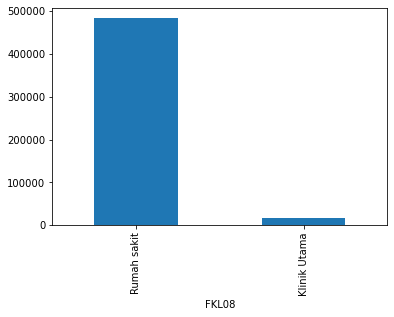

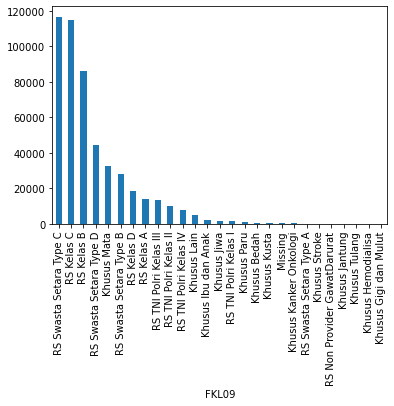

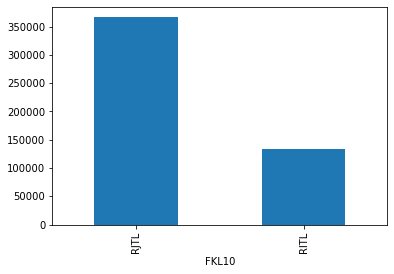

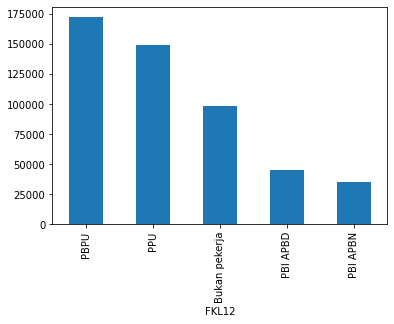

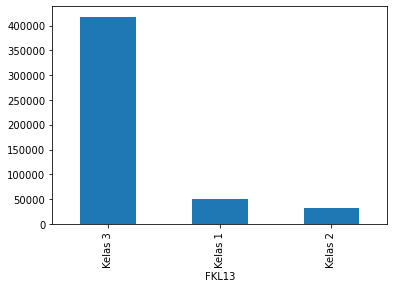

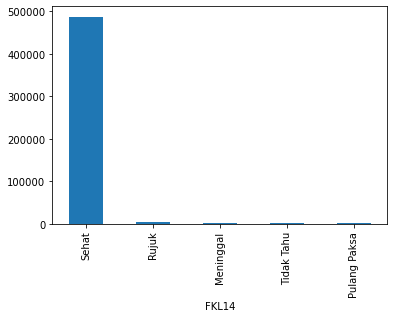

In [12]:
for i in range(8, 15):
    if i != 11:
        prefix = 'FKL'
        if i < 10:  target = prefix + '0' + str(i)
        elif i >= 10:   target = prefix + str(i)

        plt.figure(figsize=(6, 4))
        ax = df[target].value_counts().plot(kind='bar', xlabel=target)
        ax.yaxis.get_major_formatter().set_scientific(False)  # Display full number values
        plt.show()


## 10 Provinsi dengan Pasien Terbanyak

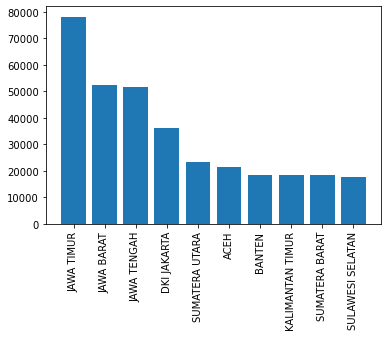

In [13]:
value_counts = df['FKL05'].value_counts()
top10 = value_counts.head(10)
plt.bar(top10.index, top10.values)
plt.xticks(rotation=90)
plt.show()


## 10 Provinsi dengan Pasien Terbanyak Beserta Rata-rata Klaim BPJSnya

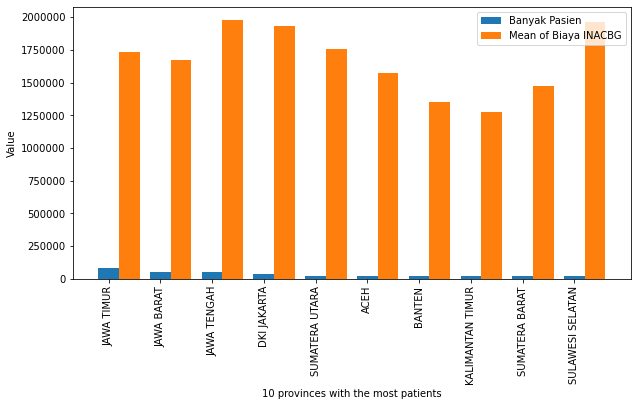

In [14]:
from matplotlib import ticker

value_counts = df['FKL05'].value_counts()
top10 = value_counts.head(10)

means = df.groupby('FKL05')['FKL32'].mean()
means = means[top10.index]

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(top10.index, top10.values, width=0.4, label='Banyak Pasien')
ax.bar([i+0.4 for i in range(len(top10.index))], means.values, width=0.4, label='Mean of Biaya INACBG')

ax.legend()
ax.set_xticklabels(top10.index, rotation=90)
ax.set_xlabel('10 provinces with the most patients')
ax.set_ylabel('Value')

formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)
plt.show()


## Rata-rata Biaya yang Ditanggung Oleh BPJS Per Penyakit

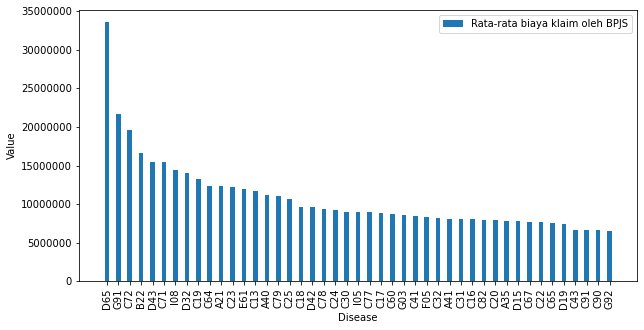

In [15]:
means = df.groupby('FKL17A')['FKL32'].mean()
means = means.sort_values(ascending=False)[:45]
df_disease_means = pd.DataFrame({'Disease': means.index, 'Mean of INACBGs': means.values})

fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(means.index, means.values, width=0.4, label='Rata-rata biaya klaim oleh BPJS')

ax.legend()
ax.set_xticklabels(means.index, rotation=90)
ax.set_xlabel('Disease')
ax.set_ylabel('Value')
formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)
plt.show()

In [16]:
df_disease_means['Amounts of case'] = df['FKL17A'].value_counts()[df_disease_means['Disease']].values
df_disease_means.sort_values(by='Amounts of case',ascending=False)

,Disease,Mean of INACBGs,Amounts of case
30,A41,8.064896e+06,874
34,C20,7.945198e+06,142
17,C18,9.664890e+06,136
38,C22,7.691433e+06,116
7,D32,1.403666e+07,111
37,C67,7.722023e+06,87
22,I05,9.004041e+06,70
4,D43,1.548843e+07,69
14,A40,1.116103e+07,63
15,C79,1.102554e+07,54


In [17]:
second_most_expensive_disease_142 = df_disease_means.sort_values(by='Amounts of case', ascending=False)['Disease'].iloc[1]
second_most_expensive_disease_142

'C20'

## Rata-rata Biaya yang Ditanggung Oleh BPJS Per Provinsi

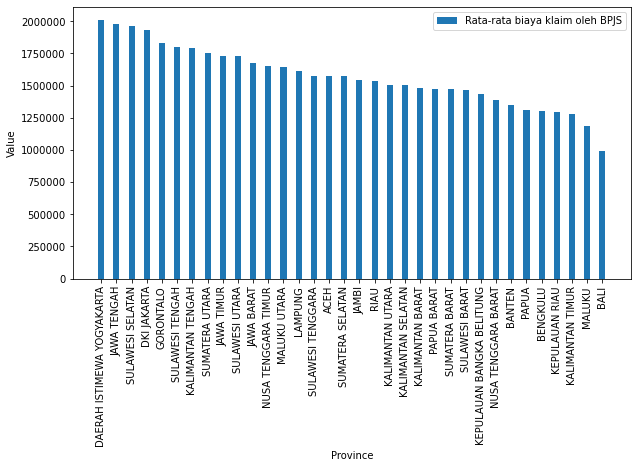

In [18]:
means = df.groupby('FKL05')['FKL32'].mean()
means = means.sort_values(ascending=False)[:34]

fig, ax = plt.subplots(figsize=(10,5))

ax.bar(means.index, means.values, width=0.4, label='Rata-rata biaya klaim oleh BPJS')

ax.legend()
ax.set_xticklabels(means.index, rotation=90)
ax.set_xlabel('Province')
ax.set_ylabel('Value')
formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)
plt.show()


## Rata-rata Biaya Tagihan Oleh Provider 

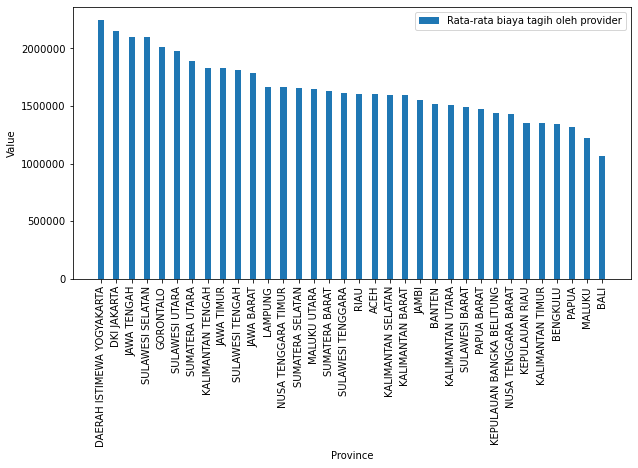

In [19]:
means = df.groupby('FKL05')['FKL47'].mean()
means = means.sort_values(ascending=False)[:34]

fig, ax = plt.subplots(figsize=(10,5))

ax.bar(means.index, means.values, width=0.4, label='Rata-rata biaya tagih oleh provider')

ax.legend()
ax.set_xticklabels(means.index, rotation=90)
ax.set_xlabel('Province')
ax.set_ylabel('Value')
formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)
plt.show()


## Province Biaya Klaim BPJS and Kelas Analysis

In [20]:
province_arr = df['FKL05'].unique()
from matplotlib import ticker

In [21]:
def class_cost(df_diy, value_counts):
    means = df_diy.groupby('FKL13')['FKL32'].mean()
    means = means[value_counts.index]
    sorted_means = means.sort_values(ascending=False)

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.bar(value_counts.index, value_counts.values, width=0.4, label='Banyak Pasien')
    ax.bar([i + 0.4 for i in range(len(value_counts.index))], sorted_means.values, width=0.4, label='Mean of Biaya Klaim')

    ax.legend()
    ax.set_xticklabels(value_counts.index, rotation=90)
    ax.set_xlabel(str(df_diy['FKL05'].head(1)))
    ax.set_ylabel('Value')

    formatter = ticker.ScalarFormatter()
    formatter.set_scientific(False)
    ax.yaxis.set_major_formatter(formatter)
    plt.show()

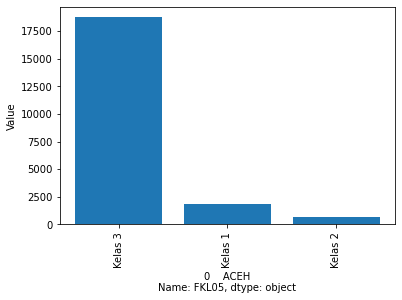

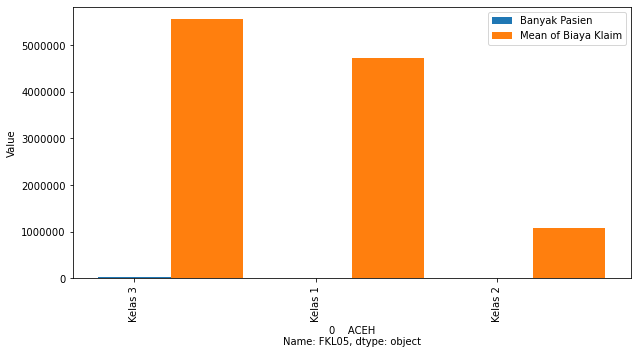

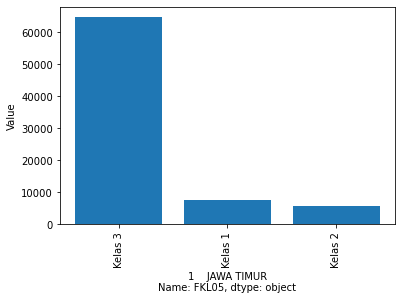

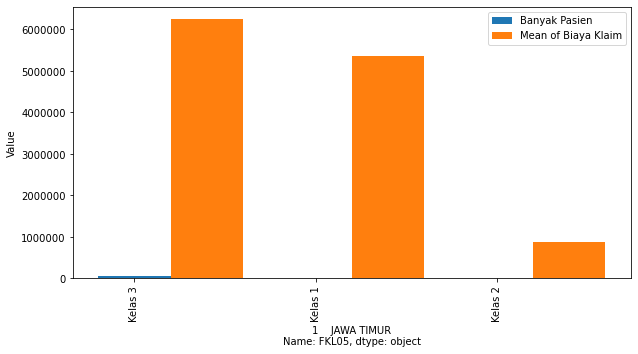

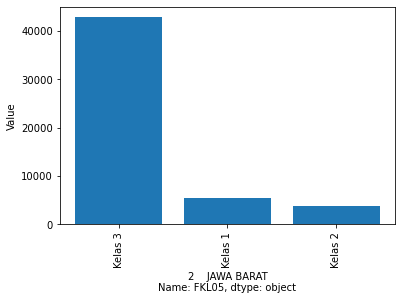

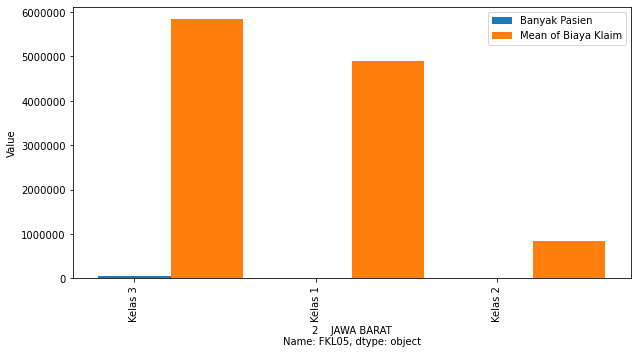

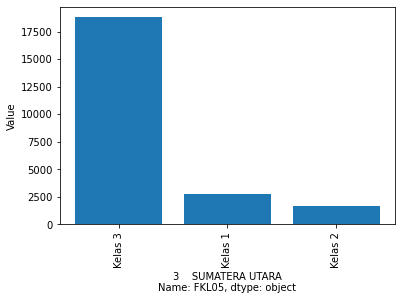

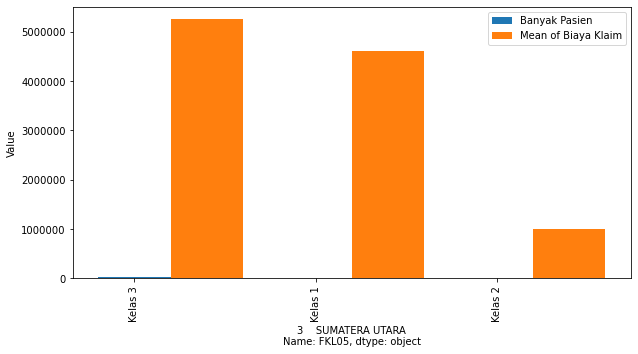

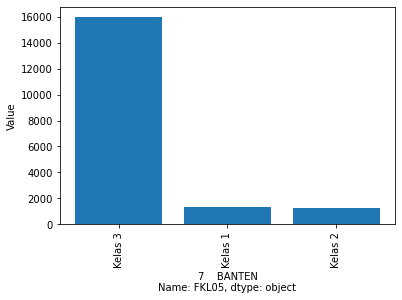

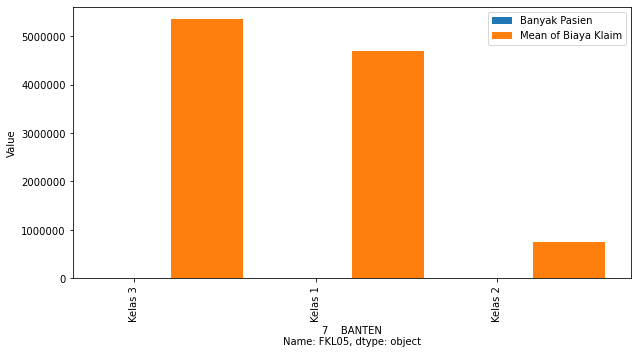

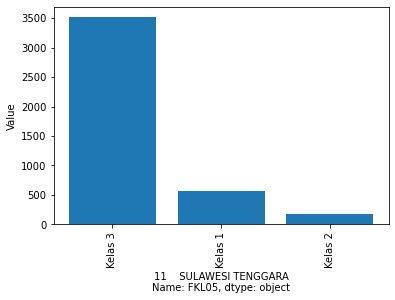

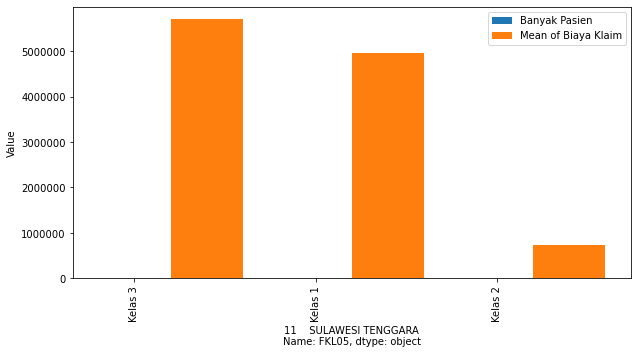

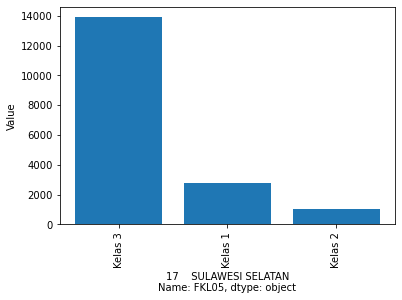

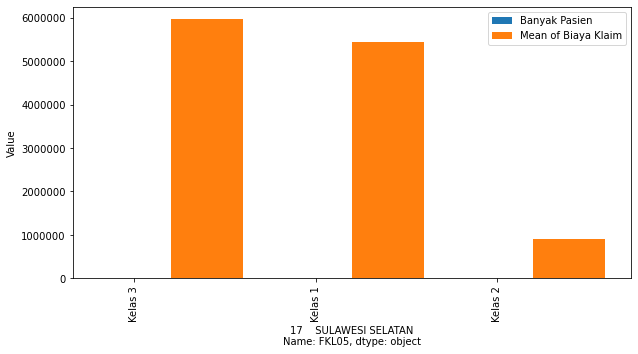

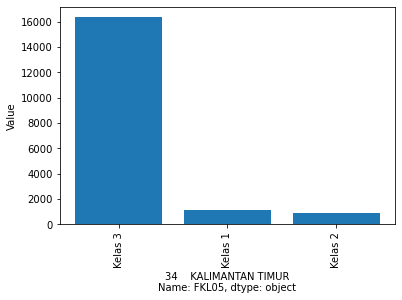

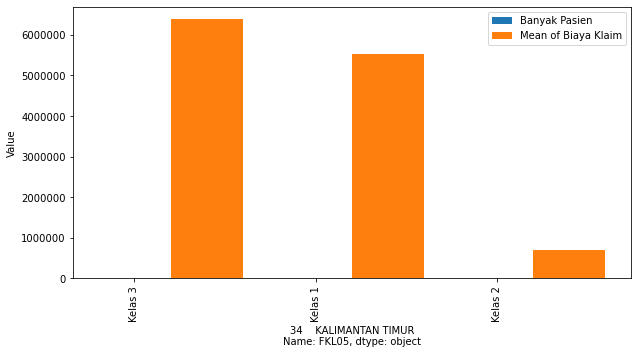

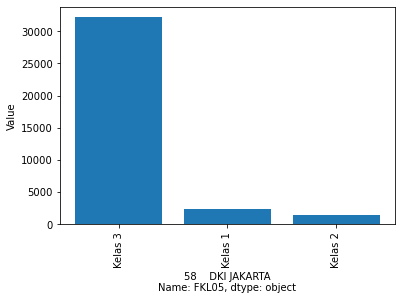

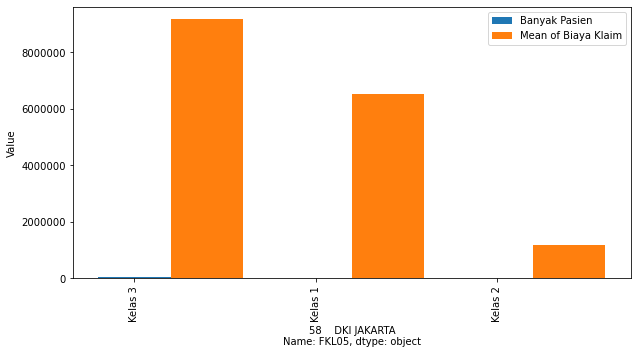

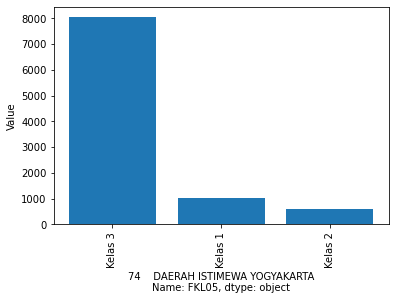

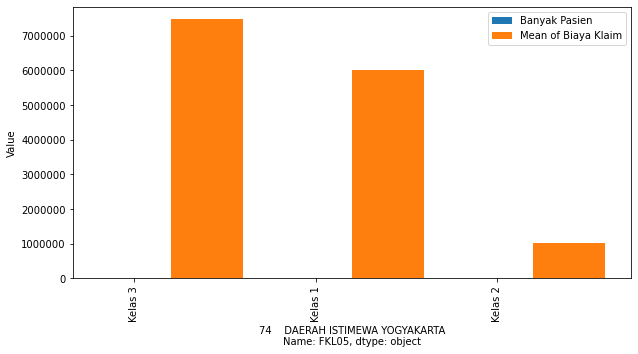

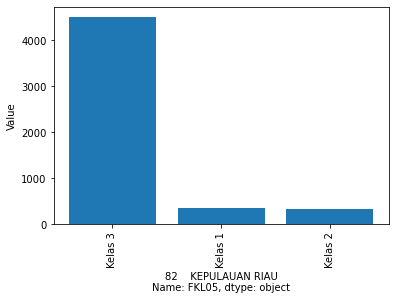

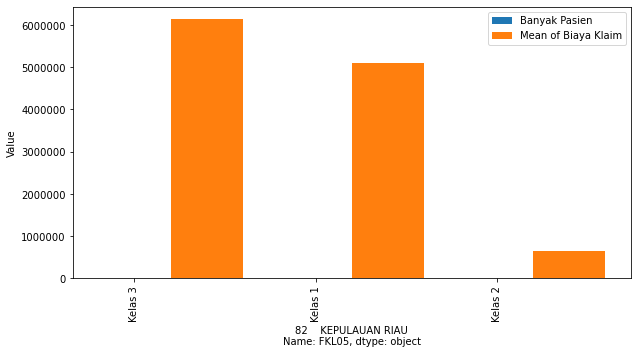

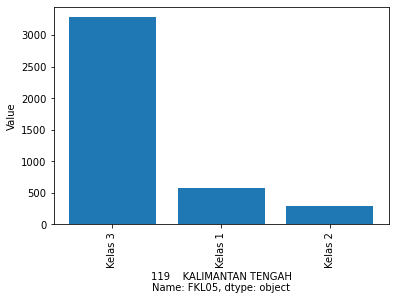

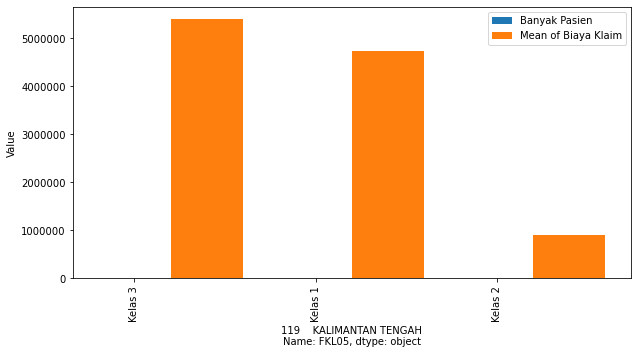

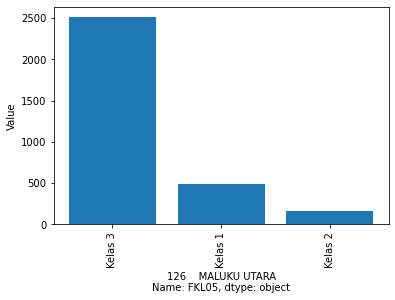

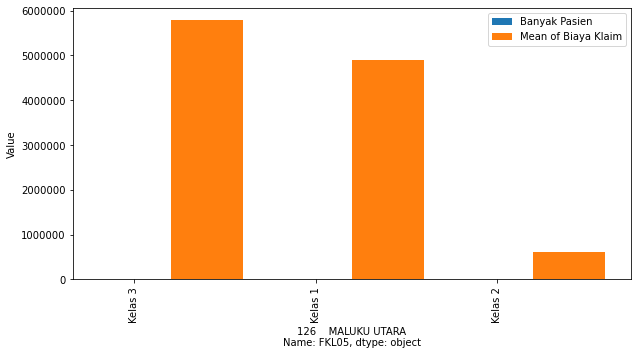

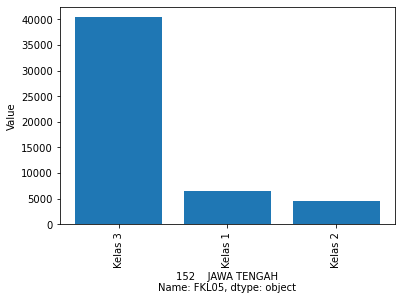

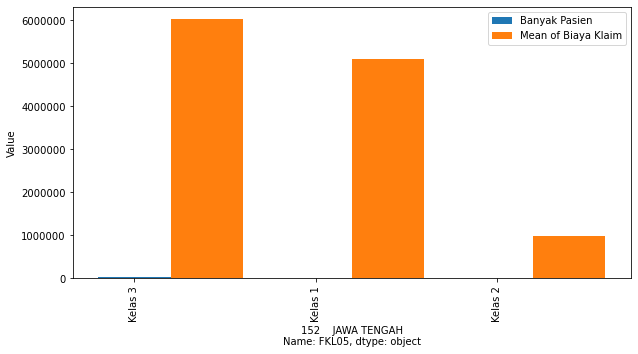

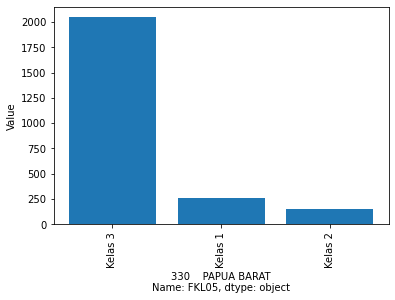

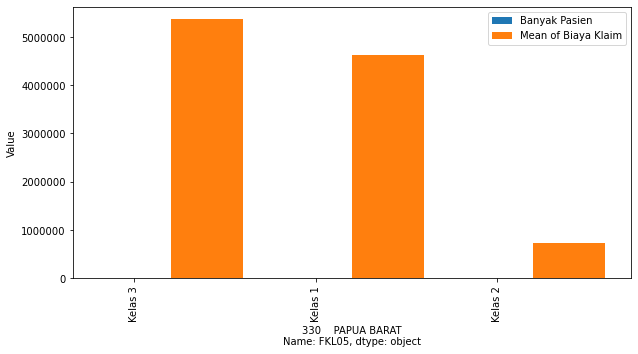

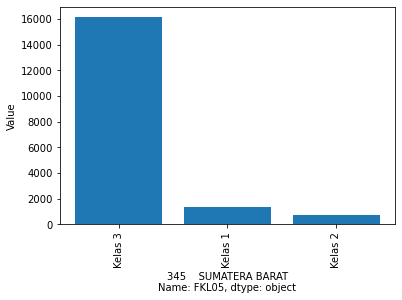

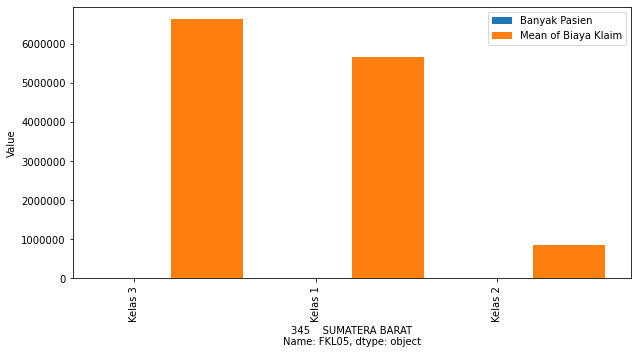

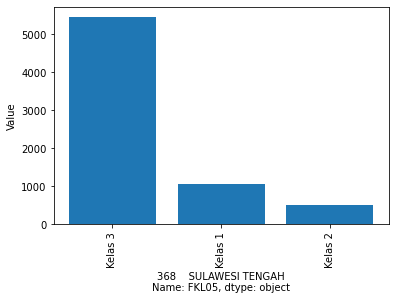

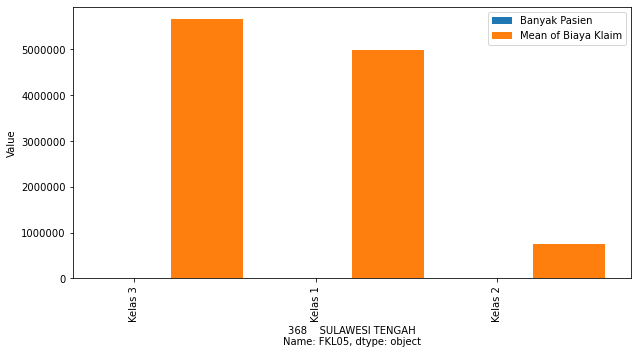

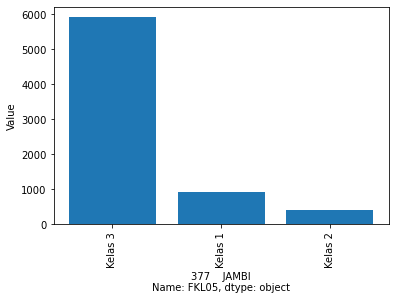

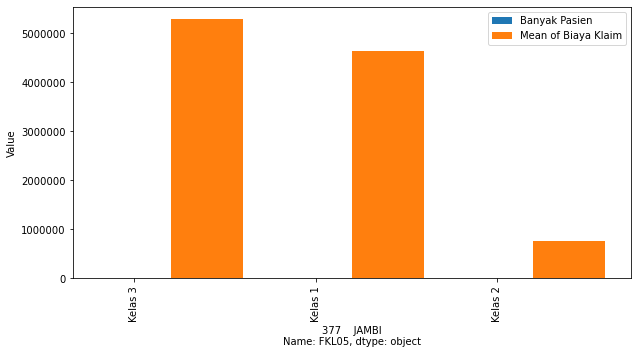

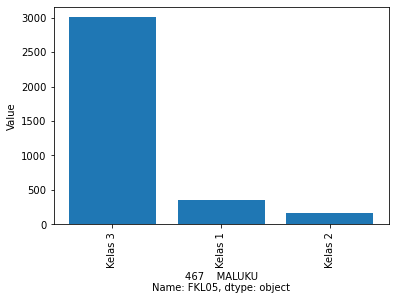

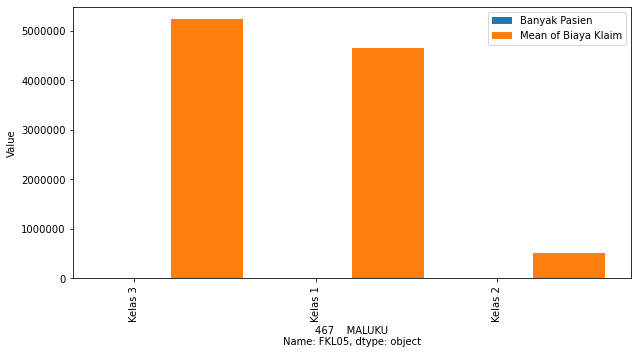

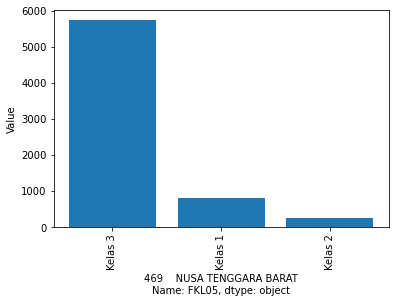

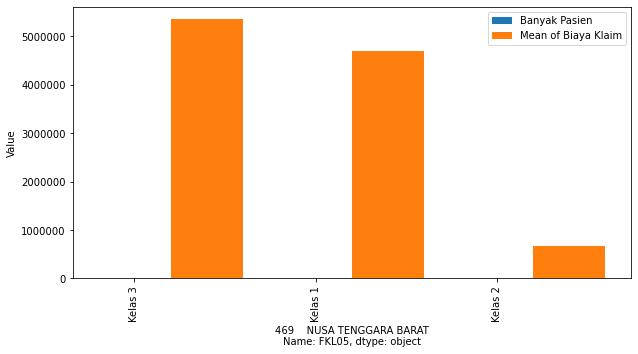

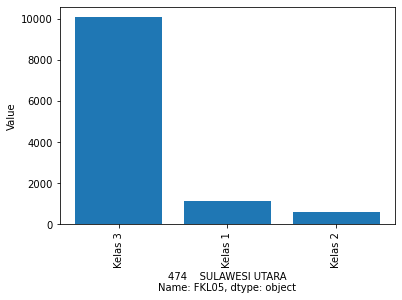

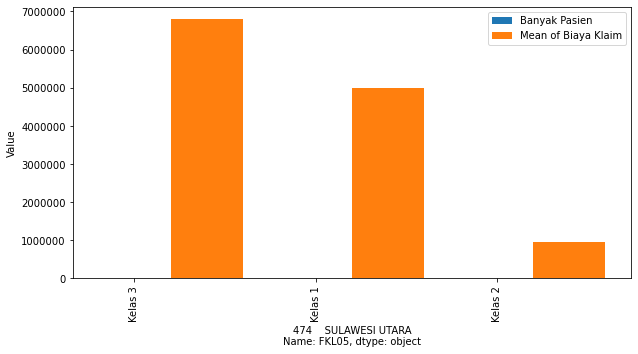

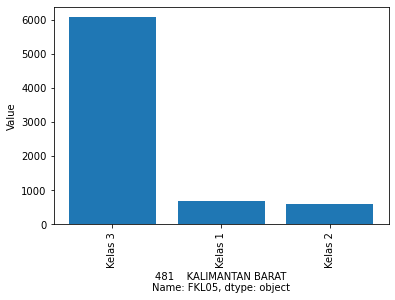

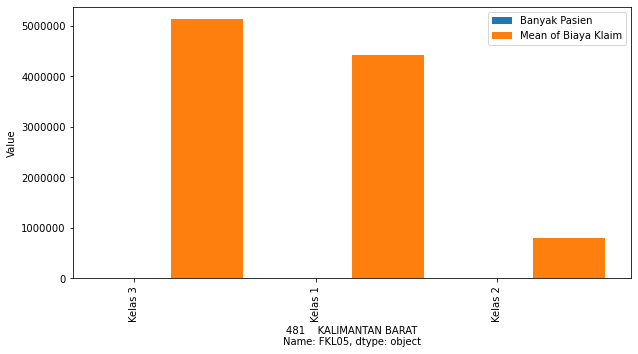

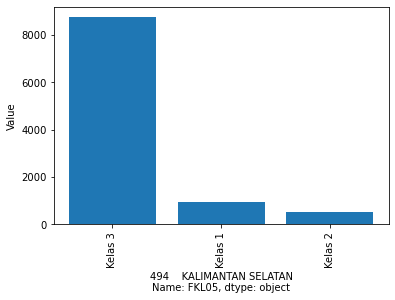

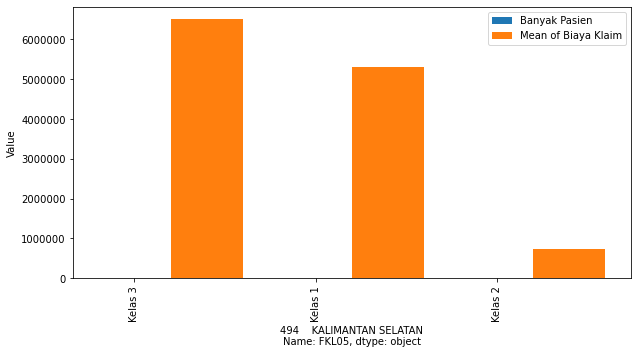

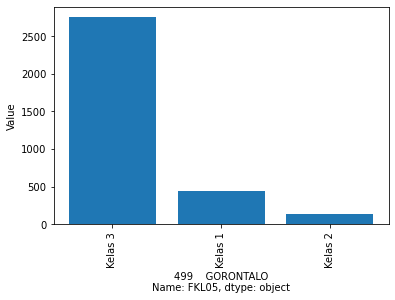

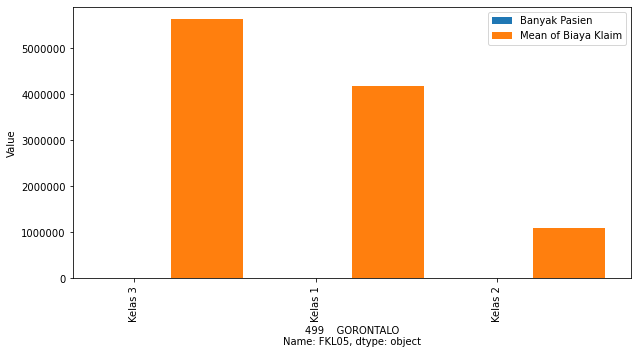

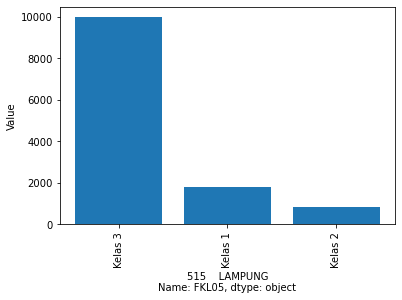

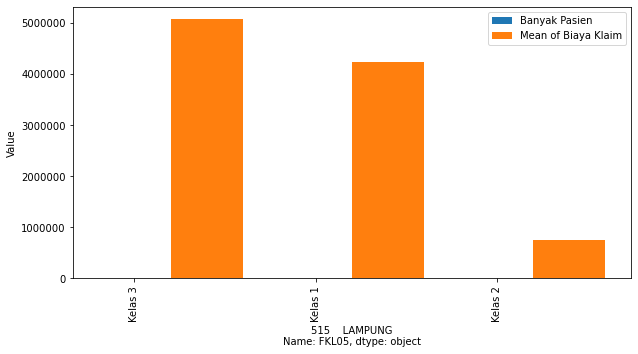

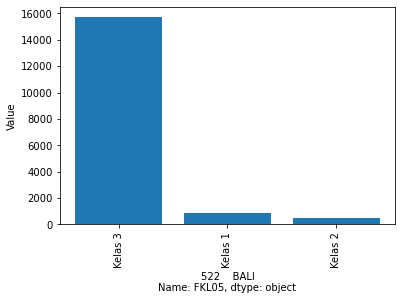

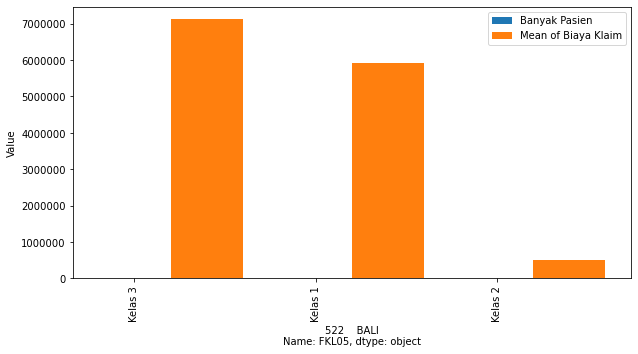

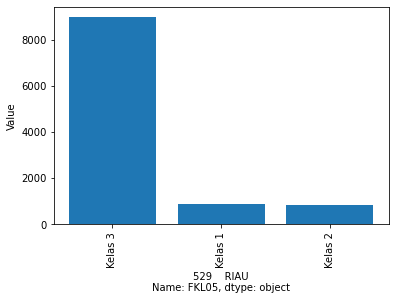

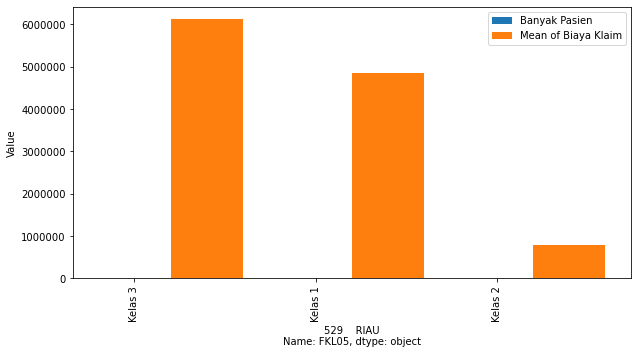

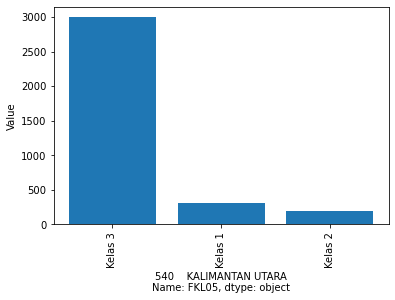

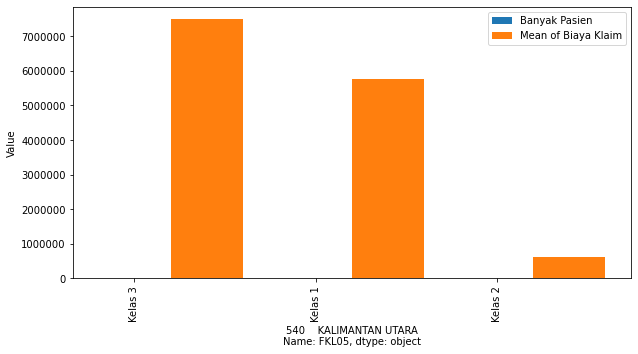

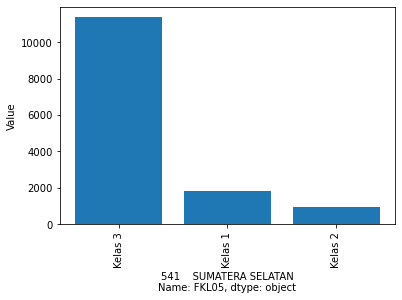

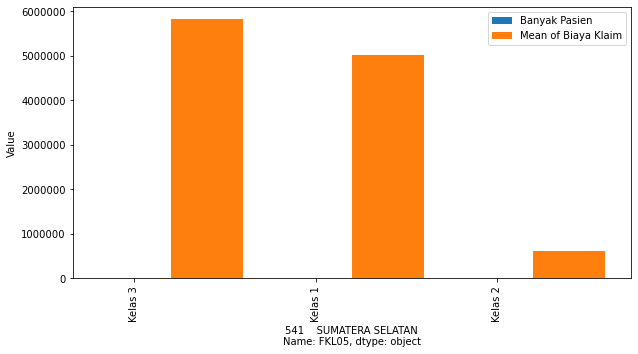

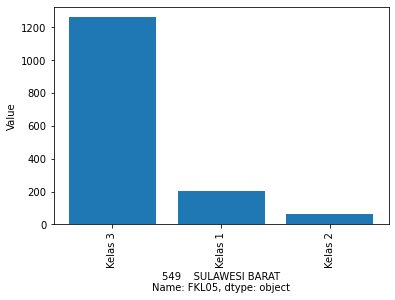

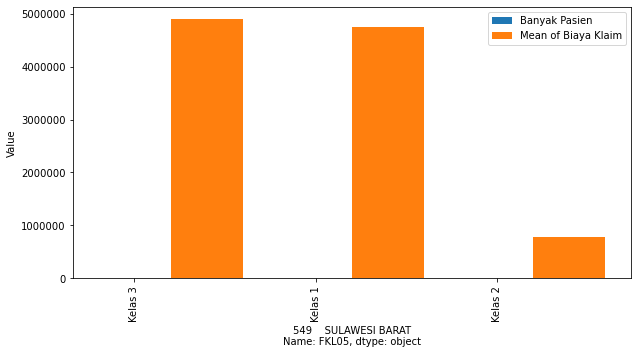

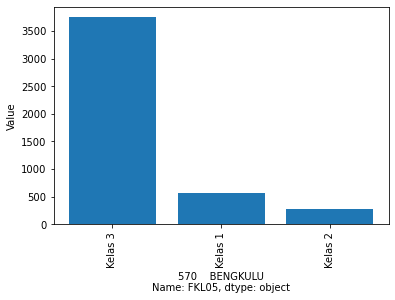

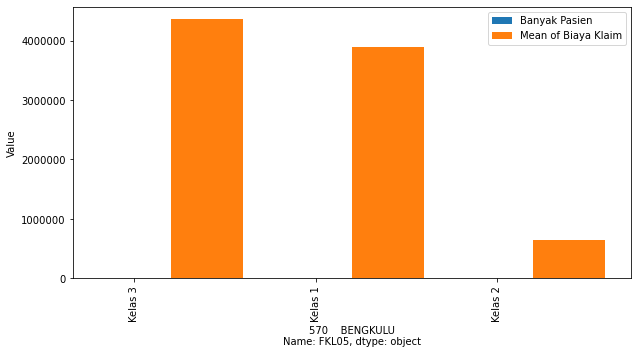

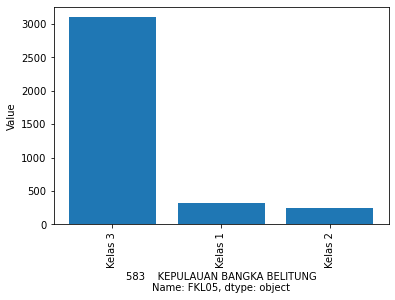

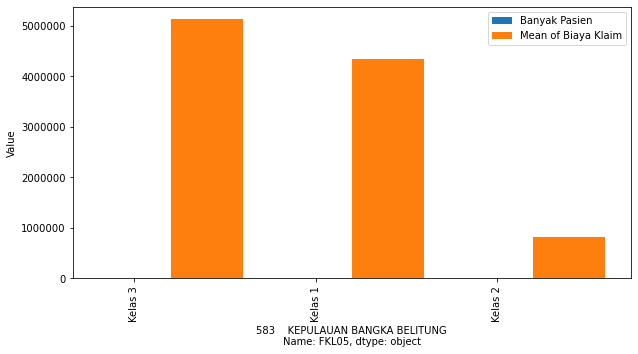

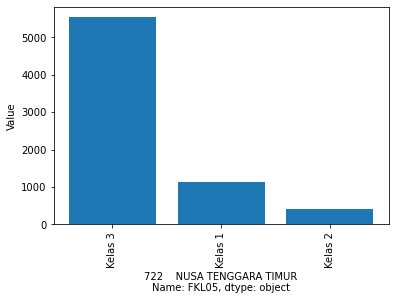

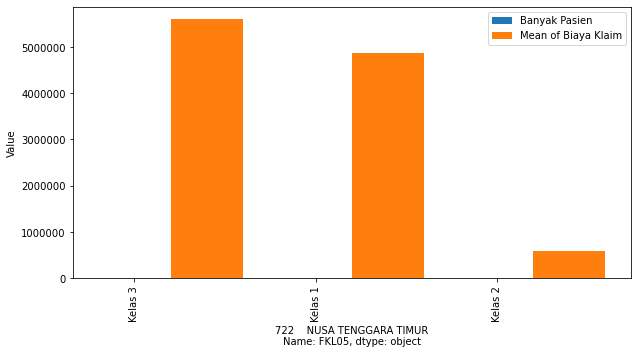

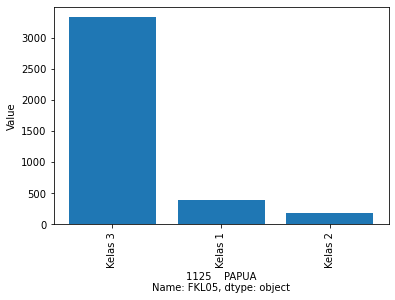

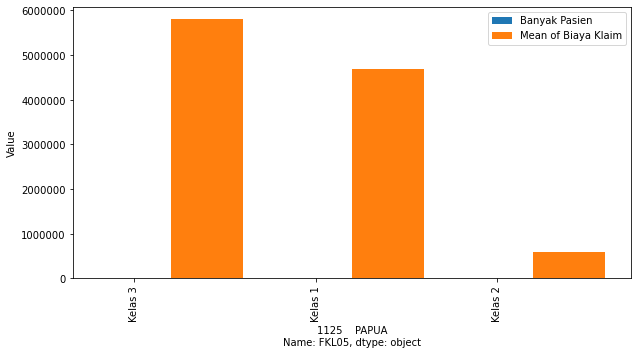

In [22]:
for province in province_arr:
    df_diy = df[df['FKL05'] == str(province)]

    value_counts = df_diy['FKL13'].value_counts()
    sorted_value_counts = value_counts.sort_values(ascending=False)
    plt.bar(sorted_value_counts.index, sorted_value_counts.values)
    plt.xticks(rotation=90)
    plt.xlabel(str(df_diy['FKL05'].head(1)))
    plt.ylabel('Value')
    plt.show()
    class_cost(df_diy, sorted_value_counts)

## Feature Engineering

PSTV01 --> Nomor peserta <br>
PSTV02 --> Nomor keluarga <br>
FKP02 --> No Asal Rujukan (ID Kunjungan FKTP) <br>
FKL03 --> Tanggal datang kunjungan FKRTL<br>
FKL04 --> Tanggal pulang kunjungan FKRTL<br>
FKL15 --> Kode dan nama diagnosis masuk ICD 10 (3 digit)<br>
FKL16 --> Kode ICD 10 diagnosis masuk FKRTL (3-6digit)<br>
FKL16A --> Nama diagnosis masuk FKRTL (3-6digit)<br>
FKL17 --> Kode dan nama diagnosis primer ICD 10 (3 digit)<br>
FKL18 --> Kode ICD 10 diagnosis primer FKRTL (3-6digit)<br>
FKL18A --> Nama diagnosis primer FKRTL (3-6digit)<br>
FKL19 --> Kode INACBGs<br>
FKL19A --> Deskripsi kode INACBGs<br>
FKL26 --> Kabupaten/Kota faskes perujuk<br>
FKL31 --> Tarif regional INACBGs -->ketuker grup<br>
FKL33 --> Kode special sub-acute groups (SA)<br>
FKL34 --> Tarif special sub-acute groups (SA)<br>
FKL36 --> Deskripsi special procedures (SP)<br>
FKL39 --> Deskripsi special prosthesis (RR)<br>
FKL42 --> Deskripsi special investigation(SI)<br>
FKL45 --> Deskripsi special drugs (SD)<br>

In [23]:
removed_col = [
'Unnamed: 0',
'PSTV01',
'PSTV02',
'FKP02',
'FKL02',
'FKL03',
'FKL04',
'FKL15',
'FKL16',
'FKL16A',
'FKL17',
'FKL18',
'FKL18A',
'FKL19',
'FKL19A',
'FKL26',
'FKL31',
'FKL33',
'FKL34',
'FKL36',
'FKL39',
'FKL42',
'FKL45']

In [24]:
clean_df = df.drop(columns=removed_col)
clean_df

,PSTV15,FKL05,FKL06,FKL07,FKL08,FKL09,FKL10,FKL11,FKL12,FKL13,...,FKL37,FKL38,FKL40,FKL41,FKL43,FKL44,FKL46,FKL47,FKL48,hour_spent
0,7.358984,ACEH,KOTA SABANG,Pemerintah kab/kota,Rumah sakit,RS Kelas D,RJTL,INT,PBI APBD,Kelas 3,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,178300,178300,0.0
1,12.906066,JAWA TIMUR,KOTA MALANG,BUMN,Rumah sakit,RS Kelas B,RJTL,Missing,PBPU,Kelas 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,395100,395100,0.0
2,11.666671,JAWA BARAT,BANDUNG BARAT,Swasta,Rumah sakit,RS Swasta Setara Type C,RITL,Missing,PBPU,Kelas 1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6042200,6042200,72.0
3,12.439169,SUMATERA UTARA,KOTA MEDAN,Swasta,Rumah sakit,RS Swasta Setara Type B,RJTL,SAR,Bukan pekerja,Kelas 3,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,194700,194700,0.0
4,13.145741,JAWA TIMUR,MALANG,Swasta,Rumah sakit,RS Kelas C,RJTL,Missing,Bukan pekerja,Kelas 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155400,155400,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,5.544345,NUSA TENGGARA TIMUR,KOTA KUPANG,Pemerintah kab/kota,Rumah sakit,RS Kelas C,RJTL,INT,Bukan pekerja,Kelas 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166300,166300,0.0
499996,12.717284,JAWA TIMUR,KOTA MALANG,TNI AD,Rumah sakit,RS TNI Polri Kelas II,RJTL,IGD,PBPU,Kelas 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165400,165400,0.0
499997,11.796684,BALI,KOTA DENPASAR,Swasta,Rumah sakit,RS Swasta Setara Type D,RJTL,UGD,PBPU,Kelas 3,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,192100,192100,0.0
499998,11.688073,BALI,TABANAN,Swasta,Rumah sakit,RS Swasta Setara Type D,RJTL,INT,Bukan pekerja,Kelas 3,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,186700,186700,0.0


## Disease Selection

Top 5 most patient disease

In [25]:
value_counts = clean_df['FKL17A'].value_counts()
top_5_values = value_counts.index[:5].to_numpy()
top_disease = value_counts[:5].index[0]
print(value_counts[:5])

E11    188061
E14     52838
H25     26204
H52     24041
E10     21385
Name: FKL17A, dtype: int64


One of the most Expensive Disease

In [26]:
compared_disease = 'C20'

# The province that has the most patients from one of the most popular diseases and from one of the most expensive disease treatment

In [27]:
most_common_diseases = []
most_common_diseases.append(top_disease)
most_common_diseases.append(compared_disease)
top_10_provinces_list = []

for top_disease in most_common_diseases:
    province_cases = clean_df[clean_df['FKL17A'] == top_disease].groupby('FKL05').size()
    top_10_provinces = province_cases.sort_values(ascending=False)[:10]
    top_10_provinces_list.append(top_10_provinces)
    
    province_with_most_cases = top_10_provinces[top_10_provinces == top_10_provinces.max()]

    print("The province(s) with the most cases of", top_disease, "is")
    for province, cases in province_with_most_cases.items():
        most_disease_province = province
        print(province, "with", cases, "cases")

    print("\nTop 10 provinces with the highest number of cases of", top_disease, ":")
    print(top_10_provinces)

# Accessing the top 10 provinces for the second disease in the list
second_disease_top_10_provinces = top_10_provinces_list[1]
print("Top 10 provinces for the second disease:")
print(second_disease_top_10_provinces)


The province(s) with the most cases of E11 is
JAWA TIMUR with 23952 cases

Top 10 provinces with the highest number of cases of E11 :
FKL05
JAWA TIMUR          23952
JAWA BARAT          19514
JAWA TENGAH         16307
DKI JAKARTA         11720
ACEH                 9362
SUMATERA UTARA       9042
KALIMANTAN TIMUR     8952
BALI                 8074
SULAWESI SELATAN     6879
SUMATERA BARAT       6712
dtype: int64
The province(s) with the most cases of C20 is
JAWA TIMUR with 29 cases

Top 10 provinces with the highest number of cases of C20 :
FKL05
JAWA TIMUR                   29
JAWA TENGAH                  17
DKI JAKARTA                  15
BALI                         13
JAWA BARAT                    9
KALIMANTAN TIMUR              8
KALIMANTAN UTARA              7
SULAWESI SELATAN              7
KEPULAUAN BANGKA BELITUNG     5
SUMATERA BARAT                5
dtype: int64
Top 10 provinces for the second disease:
FKL05
JAWA TIMUR                   29
JAWA TENGAH                  17
DKI JA

In [28]:
df_jatim_e10 = clean_df[clean_df['FKL17A'].isin(most_common_diseases)]
df_jatim_e10

,PSTV15,FKL05,FKL06,FKL07,FKL08,FKL09,FKL10,FKL11,FKL12,FKL13,...,FKL37,FKL38,FKL40,FKL41,FKL43,FKL44,FKL46,FKL47,FKL48,hour_spent
41841,6.719785,KALIMANTAN UTARA,NUNUKAN,Pemerintah kab/kota,Rumah sakit,RS Kelas C,RJTL,BED,PBI APBN,Kelas 3,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,564300,564300,0.0
41842,6.719785,KALIMANTAN UTARA,NUNUKAN,Pemerintah kab/kota,Rumah sakit,RS Kelas C,RJTL,IGD,PBI APBN,Kelas 3,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,188900,188900,0.0
41843,8.280931,SUMATERA BARAT,PASAMAN,Swasta,Rumah sakit,RS Swasta Setara Type D,RITL,Missing,PBI APBD,Kelas 3,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,3309500,3309500,48.0
41844,8.252751,JAWA TIMUR,KOTA MALANG,Pemerintah provinsi,Rumah sakit,RS Kelas A,RITL,Missing,PBPU,Kelas 1,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,20280400,20280400,96.0
41845,13.129064,JAWA TIMUR,KOTA MALANG,Swasta,Rumah sakit,RS Kelas B,RJTL,IGD,Bukan pekerja,Kelas 3,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,192400,192400,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274505,7.993400,ACEH,NAGAN RAYA,Pemerintah kab/kota,Rumah sakit,RS Kelas C,RJTL,INT,PBI APBN,Kelas 3,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,183500,183500,0.0
274506,13.286036,DKI JAKARTA,KOTA JAKARTA TIMUR,Pemerintah provinsi,Rumah sakit,RS Kelas B,RJTL,INT,PBPU,Kelas 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165400,165400,0.0
274507,11.457847,SULAWESI TENGAH,KOTA PALU,Pemerintah kab/kota,Rumah sakit,RS Kelas B,RJTL,MAT,PBPU,Kelas 3,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,185500,185500,0.0
274508,13.370047,JAWA TIMUR,KOTA SURABAYA,Swasta,Rumah sakit,RS Swasta Setara Type B,RITL,Missing,PBPU,Kelas 2,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,5873300,5873300,48.0


In [29]:
df_jatim_e10['FKL17A'].unique()

array(['C20', 'E11'], dtype=object)

## FKL35 - FKL46 Investigation

In [30]:
investigate_jatim_e10_procedure = df_jatim_e10[(pd.isna(df_jatim_e10['FKL35'])==False)]
print(investigate_jatim_e10_procedure)
# THERE IS 3 with special procedure process

df_jatim_e10['FKL37'].unique()
# All null procedure price is null

           PSTV15                       FKL05            FKL06  \
86936   11.812205                  JAWA BARAT     KOTA BANDUNG   
87688   12.284724                  JAWA TIMUR    KOTA SURABAYA   
87996   12.529255  DAERAH ISTIMEWA YOGYAKARTA           SLEMAN   
88891    0.895298                        ACEH          BIREUEN   
89812   10.780318              SUMATERA BARAT    KOTA PARIAMAN   
...           ...                         ...              ...   
264305  12.932638              SUMATERA BARAT  KOTA PAYAKUMBUH   
265646  12.774220              KEPULAUAN RIAU       KOTA BATAM   
272257  13.120706  DAERAH ISTIMEWA YOGYAKARTA           SLEMAN   
273490   6.021040                 JAWA TENGAH    KOTA SEMARANG   
274343  13.116001                  JAWA BARAT       KOTA DEPOK   

                      FKL07        FKL08                    FKL09 FKL10  \
86936              Vertikal  Rumah sakit              Khusus Mata  RITL   
87688   Pemerintah provinsi  Rumah sakit               RS

array([       0.,       nan,  8041400.,  7324100.,  3338900.,  3780000.,
        3671000.,  3825400.,  3465000.,  3638300.,  3969000.,  3506000.,
       13099000.,  3307500.,  8113700.,  3496200.,  9983400.,  7237200.,
        6626000.,  6685700.,  3681900.,  3558600., 10507100.,  8282600.,
       22860800.,  7302300.,  3814000.,  6705500.,  3609900.,  8137900.,
       14434100.])

In [31]:
investigate_jatim_e10_prosthesis = df_jatim_e10[(pd.isna(df_jatim_e10['FKL38'])==False)]
print(investigate_jatim_e10_prosthesis)
# No one patient with special prosthesis process

df_jatim_e10['FKL40'].unique()
# All null special prosthesis price is null

           PSTV15       FKL05          FKL06   FKL07        FKL08  \
125328  11.555852  JAWA TIMUR  KOTA SURABAYA  TNI AL  Rumah sakit   

                       FKL09 FKL10    FKL11          FKL12    FKL13  ...  \
125328  RS TNI Polri Kelas I  RITL  Missing  Bukan pekerja  Kelas 1  ...   

             FKL37      FKL38       FKL40 FKL41 FKL43  FKL44 FKL46     FKL47  \
125328  13099000.0  RR-04-III  26197900.0   NaN   0.0    NaN   0.0  75974000   

           FKL48 hour_spent  
125328  75974000      336.0  

[1 rows x 34 columns]


array([       0.,       nan, 26197900.])

In [32]:
investigate_jatim_e10_investigation = df_jatim_e10[(pd.isna(df_jatim_e10['FKL41'])==False)]
print(investigate_jatim_e10_investigation)
# No one patient with special investigation

df_jatim_e10['FKL43'].unique()
# All null special investigation price is null

           PSTV15             FKL05               FKL06                FKL07  \
118124  13.491970       DKI JAKARTA  KOTA JAKARTA TIMUR               Swasta   
125325   9.636492              RIAU      KOTA PEKANBARU               Swasta   
163858  10.700094       JAWA TENGAH       KOTA MAGELANG  Pemerintah kab/kota   
173610   2.600250  SULAWESI SELATAN       KOTA MAKASSAR             Vertikal   
185548  13.201696        JAWA BARAT        KOTA BANDUNG             Vertikal   
191854  10.693833    SULAWESI UTARA         KOTA MANADO  Pemerintah kab/kota   
231338   1.077909              RIAU      KOTA PEKANBARU               Swasta   
259779   4.121830    SULAWESI UTARA         KOTA MANADO               Swasta   
274452  14.103294       DKI JAKARTA  KOTA JAKARTA BARAT               Swasta   

              FKL08                    FKL09 FKL10 FKL11          FKL12  \
118124  Rumah sakit  RS Swasta Setara Type B  RJTL   SAR            PPU   
125325  Rumah sakit  RS Swasta Setara Type B  RJT

array([      0.,      nan, 1763300.,  783000., 1679300., 1888400.,
       1865900.,  610800., 1779200., 1784400., 1567400.])

In [33]:
# Patient with special drug
investigate_jatim_e10_drug = df_jatim_e10[(pd.isna(df_jatim_e10['FKL44'])==False)]
print(investigate_jatim_e10_drug)
# No one Patient with special drug price

df_jatim_e10['FKL46'].unique()
# All null drug price is null

Empty DataFrame
Columns: [PSTV15, FKL05, FKL06, FKL07, FKL08, FKL09, FKL10, FKL11, FKL12, FKL13, FKL14, FKL15A, FKL17A, FKL20, FKL21, FKL22, FKL23, FKL25, FKL27, FKL28, FKL29, FKL30, FKL32, FKL35, FKL37, FKL38, FKL40, FKL41, FKL43, FKL44, FKL46, FKL47, FKL48, hour_spent]
Index: []

[0 rows x 34 columns]


array([ 0., nan])

## Correcting with 0 values

In [34]:
df_jatim_e10['FKL37'] = df_jatim_e10['FKL37'].fillna(0)
df_jatim_e10['FKL40'] = df_jatim_e10['FKL40'].fillna(0)
df_jatim_e10['FKL43'] = df_jatim_e10['FKL43'].fillna(0)
df_jatim_e10['FKL46'] = df_jatim_e10['FKL46'].fillna(0)

In [35]:
df_jatim_e10.isna().sum()

PSTV15             0
FKL05              0
FKL06              0
FKL07              0
FKL08              0
FKL09              0
FKL10              0
FKL11              2
FKL12              0
FKL13              0
FKL14              0
FKL15A          9545
FKL17A             0
FKL20              0
FKL21              0
FKL22              0
FKL23              0
FKL25              0
FKL27              0
FKL28              0
FKL29              0
FKL30         110684
FKL32              0
FKL35         188060
FKL37              0
FKL38         188202
FKL40              0
FKL41         188194
FKL43              0
FKL44         188203
FKL46              0
FKL47              0
FKL48              0
hour_spent         0
dtype: int64

In [36]:
df_jatim_e10['FKL30'] = df_jatim_e10['FKL30'].fillna('Tidak ada')
df_jatim_e10['FKL35'] = df_jatim_e10['FKL35'].fillna('Tidak ada')
df_jatim_e10['FKL38'] = df_jatim_e10['FKL38'].fillna('Tidak ada')
df_jatim_e10['FKL41'] = df_jatim_e10['FKL41'].fillna('Tidak ada')
df_jatim_e10['FKL44'] = df_jatim_e10['FKL44'].fillna('Tidak ada')
df_jatim_e10.isna().sum()

PSTV15           0
FKL05            0
FKL06            0
FKL07            0
FKL08            0
FKL09            0
FKL10            0
FKL11            2
FKL12            0
FKL13            0
FKL14            0
FKL15A        9545
FKL17A           0
FKL20            0
FKL21            0
FKL22            0
FKL23            0
FKL25            0
FKL27            0
FKL28            0
FKL29            0
FKL30            0
FKL32            0
FKL35            0
FKL37            0
FKL38            0
FKL40            0
FKL41            0
FKL43            0
FKL44            0
FKL46            0
FKL47            0
FKL48            0
hour_spent       0
dtype: int64

In [37]:
df_jatim_e10.drop('FKL30', axis=1, inplace=True)

In [38]:
df_jatim_e10.isna().sum()

PSTV15           0
FKL05            0
FKL06            0
FKL07            0
FKL08            0
FKL09            0
FKL10            0
FKL11            2
FKL12            0
FKL13            0
FKL14            0
FKL15A        9545
FKL17A           0
FKL20            0
FKL21            0
FKL22            0
FKL23            0
FKL25            0
FKL27            0
FKL28            0
FKL29            0
FKL32            0
FKL35            0
FKL37            0
FKL38            0
FKL40            0
FKL41            0
FKL43            0
FKL44            0
FKL46            0
FKL47            0
FKL48            0
hour_spent       0
dtype: int64

## Preprocess Columns - Dealing with FKL15A and FKL17A

In [39]:
# TERIDENTIFIKASI SAMA = 2
# TERIDENTIFIKASI BEDA = 1
# TIDAK TERIDENTIFIKASI = 0
conditions = [
    (df_jatim_e10['FKL15A'] == df_jatim_e10['FKL17A']),
    (df_jatim_e10['FKL15A'].notnull()),
    (df_jatim_e10['FKL15A'].isnull())
]

values = [2, 1, 0]

df_jatim_e10['identified'] = np.select(conditions, values, default=None)
df_jatim_e10

,PSTV15,FKL05,FKL06,FKL07,FKL08,FKL09,FKL10,FKL11,FKL12,FKL13,...,FKL38,FKL40,FKL41,FKL43,FKL44,FKL46,FKL47,FKL48,hour_spent,identified
41841,6.719785,KALIMANTAN UTARA,NUNUKAN,Pemerintah kab/kota,Rumah sakit,RS Kelas C,RJTL,BED,PBI APBN,Kelas 3,...,Tidak ada,0.0,Tidak ada,0.0,Tidak ada,0.0,564300,564300,0.0,1
41842,6.719785,KALIMANTAN UTARA,NUNUKAN,Pemerintah kab/kota,Rumah sakit,RS Kelas C,RJTL,IGD,PBI APBN,Kelas 3,...,Tidak ada,0.0,Tidak ada,0.0,Tidak ada,0.0,188900,188900,0.0,2
41843,8.280931,SUMATERA BARAT,PASAMAN,Swasta,Rumah sakit,RS Swasta Setara Type D,RITL,Missing,PBI APBD,Kelas 3,...,Tidak ada,0.0,Tidak ada,0.0,Tidak ada,0.0,3309500,3309500,48.0,2
41844,8.252751,JAWA TIMUR,KOTA MALANG,Pemerintah provinsi,Rumah sakit,RS Kelas A,RITL,Missing,PBPU,Kelas 1,...,Tidak ada,0.0,Tidak ada,0.0,Tidak ada,0.0,20280400,20280400,96.0,2
41845,13.129064,JAWA TIMUR,KOTA MALANG,Swasta,Rumah sakit,RS Kelas B,RJTL,IGD,Bukan pekerja,Kelas 3,...,Tidak ada,0.0,Tidak ada,0.0,Tidak ada,0.0,192400,192400,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274505,7.993400,ACEH,NAGAN RAYA,Pemerintah kab/kota,Rumah sakit,RS Kelas C,RJTL,INT,PBI APBN,Kelas 3,...,Tidak ada,0.0,Tidak ada,0.0,Tidak ada,0.0,183500,183500,0.0,1
274506,13.286036,DKI JAKARTA,KOTA JAKARTA TIMUR,Pemerintah provinsi,Rumah sakit,RS Kelas B,RJTL,INT,PBPU,Kelas 3,...,Tidak ada,0.0,Tidak ada,0.0,Tidak ada,0.0,165400,165400,0.0,1
274507,11.457847,SULAWESI TENGAH,KOTA PALU,Pemerintah kab/kota,Rumah sakit,RS Kelas B,RJTL,MAT,PBPU,Kelas 3,...,Tidak ada,0.0,Tidak ada,0.0,Tidak ada,0.0,185500,185500,0.0,1
274508,13.370047,JAWA TIMUR,KOTA SURABAYA,Swasta,Rumah sakit,RS Swasta Setara Type B,RITL,Missing,PBPU,Kelas 2,...,Tidak ada,0.0,Tidak ada,0.0,Tidak ada,0.0,5873300,5873300,48.0,1


In [40]:
df_jatim_e10['identified'].value_counts()

1    108423
2     70235
0      9545
Name: identified, dtype: int64

In [41]:
cleaned_df_jatim_e10 = df_jatim_e10

## Preprocess Column - Differences covered Price and uncovered Price

In [42]:
cleaned_df_jatim_e10["INACBGs - Biaya Tagih"] = cleaned_df_jatim_e10["FKL47"] - cleaned_df_jatim_e10["FKL32"]
cleaned_df_jatim_e10 

,PSTV15,FKL05,FKL06,FKL07,FKL08,FKL09,FKL10,FKL11,FKL12,FKL13,...,FKL40,FKL41,FKL43,FKL44,FKL46,FKL47,FKL48,hour_spent,identified,INACBGs - Biaya Tagih
41841,6.719785,KALIMANTAN UTARA,NUNUKAN,Pemerintah kab/kota,Rumah sakit,RS Kelas C,RJTL,BED,PBI APBN,Kelas 3,...,0.0,Tidak ada,0.0,Tidak ada,0.0,564300,564300,0.0,1,0.0
41842,6.719785,KALIMANTAN UTARA,NUNUKAN,Pemerintah kab/kota,Rumah sakit,RS Kelas C,RJTL,IGD,PBI APBN,Kelas 3,...,0.0,Tidak ada,0.0,Tidak ada,0.0,188900,188900,0.0,2,0.0
41843,8.280931,SUMATERA BARAT,PASAMAN,Swasta,Rumah sakit,RS Swasta Setara Type D,RITL,Missing,PBI APBD,Kelas 3,...,0.0,Tidak ada,0.0,Tidak ada,0.0,3309500,3309500,48.0,2,0.0
41844,8.252751,JAWA TIMUR,KOTA MALANG,Pemerintah provinsi,Rumah sakit,RS Kelas A,RITL,Missing,PBPU,Kelas 1,...,0.0,Tidak ada,0.0,Tidak ada,0.0,20280400,20280400,96.0,2,0.0
41845,13.129064,JAWA TIMUR,KOTA MALANG,Swasta,Rumah sakit,RS Kelas B,RJTL,IGD,Bukan pekerja,Kelas 3,...,0.0,Tidak ada,0.0,Tidak ada,0.0,192400,192400,0.0,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274505,7.993400,ACEH,NAGAN RAYA,Pemerintah kab/kota,Rumah sakit,RS Kelas C,RJTL,INT,PBI APBN,Kelas 3,...,0.0,Tidak ada,0.0,Tidak ada,0.0,183500,183500,0.0,1,0.0
274506,13.286036,DKI JAKARTA,KOTA JAKARTA TIMUR,Pemerintah provinsi,Rumah sakit,RS Kelas B,RJTL,INT,PBPU,Kelas 3,...,0.0,Tidak ada,0.0,Tidak ada,0.0,165400,165400,0.0,1,0.0
274507,11.457847,SULAWESI TENGAH,KOTA PALU,Pemerintah kab/kota,Rumah sakit,RS Kelas B,RJTL,MAT,PBPU,Kelas 3,...,0.0,Tidak ada,0.0,Tidak ada,0.0,185500,185500,0.0,1,0.0
274508,13.370047,JAWA TIMUR,KOTA SURABAYA,Swasta,Rumah sakit,RS Swasta Setara Type B,RITL,Missing,PBPU,Kelas 2,...,0.0,Tidak ada,0.0,Tidak ada,0.0,5873300,5873300,48.0,1,0.0


In [43]:
cleaned_df_jatim_e10.columns

Index(['PSTV15', 'FKL05', 'FKL06', 'FKL07', 'FKL08', 'FKL09', 'FKL10', 'FKL11',
       'FKL12', 'FKL13', 'FKL14', 'FKL15A', 'FKL17A', 'FKL20', 'FKL21',
       'FKL22', 'FKL23', 'FKL25', 'FKL27', 'FKL28', 'FKL29', 'FKL32', 'FKL35',
       'FKL37', 'FKL38', 'FKL40', 'FKL41', 'FKL43', 'FKL44', 'FKL46', 'FKL47',
       'FKL48', 'hour_spent', 'identified', 'INACBGs - Biaya Tagih'],
      dtype='object')

In [44]:
# LIST DIAGNOSIS PENYAKIT SAAT MASUK DAN JUMLAHNYA
cleaned_df_jatim_e10['FKL15A'].value_counts()

E11    70198
E10    14937
E14    14421
Z09    10055
Z03     3918
       ...  
C93        1
N16        1
Q85        1
G52        1
Q25        1
Name: FKL15A, Length: 1005, dtype: int64

In [45]:
# LIST DIAGNOSIS PENYAKIT SAAT FINAL DAN JUMLAHNYA
cleaned_df_jatim_e10['FKL17A'].value_counts()

E11    188061
C20       142
Name: FKL17A, dtype: int64

In [46]:
cleaned_df_jatim_e10['FKL05'].nunique()

34

In [47]:
# LIST PROVINSI PERUJUK DAN JUMLAHNYA
cleaned_df_jatim_e10['FKL20'].value_counts()

Q. Ambulatory Groups-Episodic              116076
E. Endocrine system, nutrition & metabo     35801
I. Cardiovascular system Groups             12595
H. Eye and Adnexa Groups                     5027
N. Nephro-urinary System Groups              4793
Z. Factors influencing health status &       4079
G. Central Nervous System Groups             3897
M. Musculoskeletal system & connective       3574
L. Skin, subcutaneous tissue & breast G      1705
J. Respiratory system Groups                  435
K. Digestive system Groups                     95
U. Ear, nose, mouth& throat Groups             94
W. Female reproductive system Groups           11
D. Haemopoeitic & immune system Groups          7
V. Male reproductive System Groups              5
B. Hepatobiliary & pancreatic system Gr         5
C. Myeloproliferative system & neoplasm         3
O. Deleiveries Groups                           1
Name: FKL20, dtype: int64

In [48]:
# LIST PROVINSI PERUJUK DAN JUMLAHNYA
cleaned_df_jatim_e10['FKL21'].value_counts()

Rawat Jalan Bukan Prosedur         116076
Rawat Inap Bukan Prosedur           56553
Prosedur Signifikan Rawat Jalan      8756
Prosedur Rawat Inap                  5073
Prosedur Besar Rawat Jalan           1744
Rawat Inap Kebidanan                    1
Name: FKL21, dtype: int64

In [49]:
# LIST PROVINSI PERUJUK DAN JUMLAHNYA
cleaned_df_jatim_e10['FKL22'].value_counts()

44    115468
10     36000
15     12543
16      4745
17      3884
12      2983
27      2748
30      2389
37      1083
13      1012
23       862
11       826
36       709
2        657
40       485
50       473
35       458
80       335
20       237
14        68
60        42
19        30
18        27
42        25
25        25
70        19
24        16
26        15
32         8
33         7
1          7
52         4
29         4
22         3
34         1
4          1
41         1
83         1
71         1
84         1
Name: FKL22, dtype: int64

In [50]:
# LIST KEPMILIKAN FASKES PERUJUK  DAN JUMLAHNYA
cleaned_df_jatim_e10['FKL27'].value_counts()

PemKab           95476
Swasta           71315
PemProv           5778
BUKAN RUJUKAN     4493
TNI AD            3151
BUMN              2647
POLRI             2405
Vertikal          1519
TNI AU             712
TNI AL             707
Name: FKL27, dtype: int64

In [51]:
# LIST JENIS FASKES PERUJUK  DAN JUMLAHNYA
cleaned_df_jatim_e10['FKL28'].value_counts()

Puskesmas         77125
Rumah sakit       53638
Klinik Pratama    30932
Dokter Umum       20987
BUKAN RUJUKAN      4493
Klinik Utama        937
Lain-lain            29
Dokter gigi          24
Apotik               20
MISSING              10
Laboratorium          4
Pemerintah            3
Optik                 1
Name: FKL28, dtype: int64

In [52]:
# LIST TIPE FASKES PERUJUK  DAN JUMLAHNYA
cleaned_df_jatim_e10['FKL29'].value_counts()

NON RAWAT INAP               52073
KLINIK NON RAWAT INAP        28255
RAWAT INAP                   25059
DOKTER PRAKTER PERORANGAN    20983
RS SWASTA SETARA TYPE C      13044
RS KELAS C                   12758
RS KELAS B                   10415
RS SWASTA SETARA TYPE D       5961
BUKAN RUJUKAN                 4493
RS SWASTA SETARA TYPE B       3683
KLINIK RAWAT INAP             2626
RS KELAS D                    1958
RS KELAS A                    1910
RS TNI POLRI KELAS III        1148
RS TNI POLRI KELAS IV          969
KHUSUS LAIN                    743
RS TNI POLRI KELAS II          736
KHUSUS MATA                    436
RS TNI POLRI KELAS I           250
KHUSUS JIWA                    170
KHUSUS IBU DAN ANAK            113
KHUSUS PARU                    107
RS KELAS D PRATAMA              51
KHUSUS BEDAH                    50
KHUSUS STROKE                   37
RS SWASTA SETARA TYPE A         31
PPK TIDAK DITUNJUK              25
DOKTER GIGI                     24
KHUSUS KUSTA        

In [53]:
# LIST SPECIAL PROCEDURE DAN JUMLAHNYA
cleaned_df_jatim_e10['FKL35'].value_counts()

Tidak ada    188060
YY-09-III        78
YY-10-III        59
YY-02-III         3
YY-13-III         2
YY-01-II          1
Name: FKL35, dtype: int64

In [54]:
# LIST SPECIAL PROSTHESIS DAN JUMLAHNYA
cleaned_df_jatim_e10['FKL38'].value_counts()

Tidak ada    188202
RR-04-III         1
Name: FKL38, dtype: int64

In [55]:
# LIST SPECIAL INVESTIGATION DAN JUMLAHNYA
cleaned_df_jatim_e10['FKL41'].value_counts()

Tidak ada    188194
II-02-III         7
II-01-III         2
Name: FKL41, dtype: int64

In [56]:
# LIST SPECIAL DRUGS DAN JUMLAHNYA
cleaned_df_jatim_e10['FKL44'].value_counts()

Tidak ada    188203
Name: FKL44, dtype: int64

HARGA DARI SPECIAL DI ATAS

In [57]:
cleaned_df_jatim_e10['FKL37'].value_counts()

0.0           188060
8041400.0         29
7324100.0         12
7237200.0         12
3496200.0         10
3671000.0         10
3465000.0         10
3681900.0          7
9983400.0          6
8113700.0          5
3780000.0          5
3307500.0          4
6626000.0          4
6685700.0          4
3638300.0          3
3825400.0          3
3969000.0          2
7302300.0          2
3558600.0          2
6705500.0          2
3814000.0          2
8137900.0          1
3609900.0          1
3338900.0          1
22860800.0         1
8282600.0          1
10507100.0         1
3506000.0          1
13099000.0         1
14434100.0         1
Name: FKL37, dtype: int64

In [58]:
cleaned_df_jatim_e10['FKL40'].value_counts()

0.0           188202
26197900.0         1
Name: FKL40, dtype: int64

In [59]:
cleaned_df_jatim_e10['FKL43'].value_counts()

0.0          188194
1763300.0         1
783000.0          1
1679300.0         1
1888400.0         1
1865900.0         1
610800.0          1
1779200.0         1
1784400.0         1
1567400.0         1
Name: FKL43, dtype: int64

In [60]:
cleaned_df_jatim_e10['FKL46'].value_counts()

0.0    188203
Name: FKL46, dtype: int64

In [61]:
cleaned_df_jatim_e10['FKL20'].value_counts()

Q. Ambulatory Groups-Episodic              116076
E. Endocrine system, nutrition & metabo     35801
I. Cardiovascular system Groups             12595
H. Eye and Adnexa Groups                     5027
N. Nephro-urinary System Groups              4793
Z. Factors influencing health status &       4079
G. Central Nervous System Groups             3897
M. Musculoskeletal system & connective       3574
L. Skin, subcutaneous tissue & breast G      1705
J. Respiratory system Groups                  435
K. Digestive system Groups                     95
U. Ear, nose, mouth& throat Groups             94
W. Female reproductive system Groups           11
D. Haemopoeitic & immune system Groups          7
V. Male reproductive System Groups              5
B. Hepatobiliary & pancreatic system Gr         5
C. Myeloproliferative system & neoplasm         3
O. Deleiveries Groups                           1
Name: FKL20, dtype: int64

In [62]:
cleaned_df_jatim_e10['FKL21'].value_counts()

Rawat Jalan Bukan Prosedur         116076
Rawat Inap Bukan Prosedur           56553
Prosedur Signifikan Rawat Jalan      8756
Prosedur Rawat Inap                  5073
Prosedur Besar Rawat Jalan           1744
Rawat Inap Kebidanan                    1
Name: FKL21, dtype: int64

In [63]:
cleaned_df_jatim_e10['FKL22'].value_counts()

44    115468
10     36000
15     12543
16      4745
17      3884
12      2983
27      2748
30      2389
37      1083
13      1012
23       862
11       826
36       709
2        657
40       485
50       473
35       458
80       335
20       237
14        68
60        42
19        30
18        27
42        25
25        25
70        19
24        16
26        15
32         8
33         7
1          7
52         4
29         4
22         3
34         1
4          1
41         1
83         1
71         1
84         1
Name: FKL22, dtype: int64

In [64]:
cleaned_df_jatim_e10['FKL23'].value_counts()

Rawat Jalan                        126576
Ringan (rawat inap keparahan 1)     38881
Sedang (rawat inap keparahan 2)     16784
Berat (rawat inap keparahan 3)       5962
Name: FKL23, dtype: int64

## Removing post processed column and unnecessary

In [65]:
# Remove previous investigated column
removed_arr = [
'FKL05',
'FKL06',
'FKL15A',
'FKL17A',
'FKL20',
'FKL27',
'FKL47',
'FKL48',
]

In [66]:
important_only_jatim_e10 = cleaned_df_jatim_e10.drop(columns=removed_arr)
important_only_jatim_e10

,PSTV15,FKL07,FKL08,FKL09,FKL10,FKL11,FKL12,FKL13,FKL14,FKL21,...,FKL37,FKL38,FKL40,FKL41,FKL43,FKL44,FKL46,hour_spent,identified,INACBGs - Biaya Tagih
41841,6.719785,Pemerintah kab/kota,Rumah sakit,RS Kelas C,RJTL,BED,PBI APBN,Kelas 3,Sehat,Prosedur Signifikan Rawat Jalan,...,0.0,Tidak ada,0.0,Tidak ada,0.0,Tidak ada,0.0,0.0,1,0.0
41842,6.719785,Pemerintah kab/kota,Rumah sakit,RS Kelas C,RJTL,IGD,PBI APBN,Kelas 3,Sehat,Prosedur Signifikan Rawat Jalan,...,0.0,Tidak ada,0.0,Tidak ada,0.0,Tidak ada,0.0,0.0,2,0.0
41843,8.280931,Swasta,Rumah sakit,RS Swasta Setara Type D,RITL,Missing,PBI APBD,Kelas 3,Sehat,Rawat Inap Bukan Prosedur,...,0.0,Tidak ada,0.0,Tidak ada,0.0,Tidak ada,0.0,48.0,2,0.0
41844,8.252751,Pemerintah provinsi,Rumah sakit,RS Kelas A,RITL,Missing,PBPU,Kelas 1,Sehat,Prosedur Rawat Inap,...,0.0,Tidak ada,0.0,Tidak ada,0.0,Tidak ada,0.0,96.0,2,0.0
41845,13.129064,Swasta,Rumah sakit,RS Kelas B,RJTL,IGD,Bukan pekerja,Kelas 3,Rujuk,Rawat Jalan Bukan Prosedur,...,0.0,Tidak ada,0.0,Tidak ada,0.0,Tidak ada,0.0,0.0,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274505,7.993400,Pemerintah kab/kota,Rumah sakit,RS Kelas C,RJTL,INT,PBI APBN,Kelas 3,Sehat,Rawat Jalan Bukan Prosedur,...,0.0,Tidak ada,0.0,Tidak ada,0.0,Tidak ada,0.0,0.0,1,0.0
274506,13.286036,Pemerintah provinsi,Rumah sakit,RS Kelas B,RJTL,INT,PBPU,Kelas 3,Sehat,Rawat Jalan Bukan Prosedur,...,0.0,Tidak ada,0.0,Tidak ada,0.0,Tidak ada,0.0,0.0,1,0.0
274507,11.457847,Pemerintah kab/kota,Rumah sakit,RS Kelas B,RJTL,MAT,PBPU,Kelas 3,Sehat,Rawat Jalan Bukan Prosedur,...,0.0,Tidak ada,0.0,Tidak ada,0.0,Tidak ada,0.0,0.0,1,0.0
274508,13.370047,Swasta,Rumah sakit,RS Swasta Setara Type B,RITL,Missing,PBPU,Kelas 2,Sehat,Rawat Inap Bukan Prosedur,...,0.0,Tidak ada,0.0,Tidak ada,0.0,Tidak ada,0.0,48.0,1,0.0


In [67]:
important_only_jatim_e10.columns

Index(['PSTV15', 'FKL07', 'FKL08', 'FKL09', 'FKL10', 'FKL11', 'FKL12', 'FKL13',
       'FKL14', 'FKL21', 'FKL22', 'FKL23', 'FKL25', 'FKL28', 'FKL29', 'FKL32',
       'FKL35', 'FKL37', 'FKL38', 'FKL40', 'FKL41', 'FKL43', 'FKL44', 'FKL46',
       'hour_spent', 'identified', 'INACBGs - Biaya Tagih'],
      dtype='object')

In [68]:
important_only_jatim_e10['INACBGs - Biaya Tagih'].value_counts()

 0.0           188022
 8041400.0         29
 7324100.0         12
 7237200.0         12
 3465000.0         10
 3496200.0         10
 3671000.0         10
 3681900.0          7
 9983400.0          6
-4.0                6
 4.0                6
 8113700.0          5
 3780000.0          5
 6626000.0          4
 3307500.0          4
 6685700.0          4
 3825400.0          3
 3638300.0          3
 3609900.0          3
 7302300.0          2
 3814000.0          2
 3558600.0          2
 6705500.0          2
 3008300.0          2
 3309100.0          2
 3969000.0          2
 3338900.0          2
 6857300.0          2
 22860800.0         1
 776000.0           1
 1784400.0          1
 1865500.0          1
 14434100.0         1
 8137900.0          1
 6837000.0          1
 7528900.0          1
 1779200.0          1
 7596700.0          1
 1428.0             1
 39296900.0         1
 610800.0           1
 1865900.0          1
 1888400.0          1
 8282600.0          1
 10507100.0         1
 484400.0 

In [69]:
important_only_jatim_e10['FKL41'].value_counts()

Tidak ada    188194
II-02-III         7
II-01-III         2
Name: FKL41, dtype: int64

In [70]:
important_only_jatim_e10.columns

Index(['PSTV15', 'FKL07', 'FKL08', 'FKL09', 'FKL10', 'FKL11', 'FKL12', 'FKL13',
       'FKL14', 'FKL21', 'FKL22', 'FKL23', 'FKL25', 'FKL28', 'FKL29', 'FKL32',
       'FKL35', 'FKL37', 'FKL38', 'FKL40', 'FKL41', 'FKL43', 'FKL44', 'FKL46',
       'hour_spent', 'identified', 'INACBGs - Biaya Tagih'],
      dtype='object')

In [71]:
fix_reduced_diagnosis = important_only_jatim_e10
fix_reduced_diagnosis

,PSTV15,FKL07,FKL08,FKL09,FKL10,FKL11,FKL12,FKL13,FKL14,FKL21,...,FKL37,FKL38,FKL40,FKL41,FKL43,FKL44,FKL46,hour_spent,identified,INACBGs - Biaya Tagih
41841,6.719785,Pemerintah kab/kota,Rumah sakit,RS Kelas C,RJTL,BED,PBI APBN,Kelas 3,Sehat,Prosedur Signifikan Rawat Jalan,...,0.0,Tidak ada,0.0,Tidak ada,0.0,Tidak ada,0.0,0.0,1,0.0
41842,6.719785,Pemerintah kab/kota,Rumah sakit,RS Kelas C,RJTL,IGD,PBI APBN,Kelas 3,Sehat,Prosedur Signifikan Rawat Jalan,...,0.0,Tidak ada,0.0,Tidak ada,0.0,Tidak ada,0.0,0.0,2,0.0
41843,8.280931,Swasta,Rumah sakit,RS Swasta Setara Type D,RITL,Missing,PBI APBD,Kelas 3,Sehat,Rawat Inap Bukan Prosedur,...,0.0,Tidak ada,0.0,Tidak ada,0.0,Tidak ada,0.0,48.0,2,0.0
41844,8.252751,Pemerintah provinsi,Rumah sakit,RS Kelas A,RITL,Missing,PBPU,Kelas 1,Sehat,Prosedur Rawat Inap,...,0.0,Tidak ada,0.0,Tidak ada,0.0,Tidak ada,0.0,96.0,2,0.0
41845,13.129064,Swasta,Rumah sakit,RS Kelas B,RJTL,IGD,Bukan pekerja,Kelas 3,Rujuk,Rawat Jalan Bukan Prosedur,...,0.0,Tidak ada,0.0,Tidak ada,0.0,Tidak ada,0.0,0.0,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274505,7.993400,Pemerintah kab/kota,Rumah sakit,RS Kelas C,RJTL,INT,PBI APBN,Kelas 3,Sehat,Rawat Jalan Bukan Prosedur,...,0.0,Tidak ada,0.0,Tidak ada,0.0,Tidak ada,0.0,0.0,1,0.0
274506,13.286036,Pemerintah provinsi,Rumah sakit,RS Kelas B,RJTL,INT,PBPU,Kelas 3,Sehat,Rawat Jalan Bukan Prosedur,...,0.0,Tidak ada,0.0,Tidak ada,0.0,Tidak ada,0.0,0.0,1,0.0
274507,11.457847,Pemerintah kab/kota,Rumah sakit,RS Kelas B,RJTL,MAT,PBPU,Kelas 3,Sehat,Rawat Jalan Bukan Prosedur,...,0.0,Tidak ada,0.0,Tidak ada,0.0,Tidak ada,0.0,0.0,1,0.0
274508,13.370047,Swasta,Rumah sakit,RS Swasta Setara Type B,RITL,Missing,PBPU,Kelas 2,Sehat,Rawat Inap Bukan Prosedur,...,0.0,Tidak ada,0.0,Tidak ada,0.0,Tidak ada,0.0,48.0,1,0.0


In [72]:
fix_reduced_diagnosis['FKL35'].value_counts()

Tidak ada    188060
YY-09-III        78
YY-10-III        59
YY-02-III         3
YY-13-III         2
YY-01-II          1
Name: FKL35, dtype: int64

In [73]:
fix_reduced_diagnosis.isna().sum()

PSTV15                   0
FKL07                    0
FKL08                    0
FKL09                    0
FKL10                    0
FKL11                    2
FKL12                    0
FKL13                    0
FKL14                    0
FKL21                    0
FKL22                    0
FKL23                    0
FKL25                    0
FKL28                    0
FKL29                    0
FKL32                    0
FKL35                    0
FKL37                    0
FKL38                    0
FKL40                    0
FKL41                    0
FKL43                    0
FKL44                    0
FKL46                    0
hour_spent               0
identified               0
INACBGs - Biaya Tagih    0
dtype: int64

In [74]:
fix_reduced_diagnosis.drop(['FKL44','FKL46'],axis=1,inplace=True)

In [75]:
fix_reduced_diagnosis

,PSTV15,FKL07,FKL08,FKL09,FKL10,FKL11,FKL12,FKL13,FKL14,FKL21,...,FKL32,FKL35,FKL37,FKL38,FKL40,FKL41,FKL43,hour_spent,identified,INACBGs - Biaya Tagih
41841,6.719785,Pemerintah kab/kota,Rumah sakit,RS Kelas C,RJTL,BED,PBI APBN,Kelas 3,Sehat,Prosedur Signifikan Rawat Jalan,...,564300.0,Tidak ada,0.0,Tidak ada,0.0,Tidak ada,0.0,0.0,1,0.0
41842,6.719785,Pemerintah kab/kota,Rumah sakit,RS Kelas C,RJTL,IGD,PBI APBN,Kelas 3,Sehat,Prosedur Signifikan Rawat Jalan,...,188900.0,Tidak ada,0.0,Tidak ada,0.0,Tidak ada,0.0,0.0,2,0.0
41843,8.280931,Swasta,Rumah sakit,RS Swasta Setara Type D,RITL,Missing,PBI APBD,Kelas 3,Sehat,Rawat Inap Bukan Prosedur,...,3309500.0,Tidak ada,0.0,Tidak ada,0.0,Tidak ada,0.0,48.0,2,0.0
41844,8.252751,Pemerintah provinsi,Rumah sakit,RS Kelas A,RITL,Missing,PBPU,Kelas 1,Sehat,Prosedur Rawat Inap,...,20280400.0,Tidak ada,0.0,Tidak ada,0.0,Tidak ada,0.0,96.0,2,0.0
41845,13.129064,Swasta,Rumah sakit,RS Kelas B,RJTL,IGD,Bukan pekerja,Kelas 3,Rujuk,Rawat Jalan Bukan Prosedur,...,192400.0,Tidak ada,0.0,Tidak ada,0.0,Tidak ada,0.0,0.0,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274505,7.993400,Pemerintah kab/kota,Rumah sakit,RS Kelas C,RJTL,INT,PBI APBN,Kelas 3,Sehat,Rawat Jalan Bukan Prosedur,...,183500.0,Tidak ada,0.0,Tidak ada,0.0,Tidak ada,0.0,0.0,1,0.0
274506,13.286036,Pemerintah provinsi,Rumah sakit,RS Kelas B,RJTL,INT,PBPU,Kelas 3,Sehat,Rawat Jalan Bukan Prosedur,...,165400.0,Tidak ada,0.0,Tidak ada,0.0,Tidak ada,0.0,0.0,1,0.0
274507,11.457847,Pemerintah kab/kota,Rumah sakit,RS Kelas B,RJTL,MAT,PBPU,Kelas 3,Sehat,Rawat Jalan Bukan Prosedur,...,185500.0,Tidak ada,0.0,Tidak ada,0.0,Tidak ada,0.0,0.0,1,0.0
274508,13.370047,Swasta,Rumah sakit,RS Swasta Setara Type B,RITL,Missing,PBPU,Kelas 2,Sehat,Rawat Inap Bukan Prosedur,...,5873300.0,Tidak ada,0.0,Tidak ada,0.0,Tidak ada,0.0,48.0,1,0.0


In [76]:
fix_reduced_diagnosis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188203 entries, 41841 to 274509
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   PSTV15                 188203 non-null  float64
 1   FKL07                  188203 non-null  object 
 2   FKL08                  188203 non-null  object 
 3   FKL09                  188203 non-null  object 
 4   FKL10                  188203 non-null  object 
 5   FKL11                  188201 non-null  object 
 6   FKL12                  188203 non-null  object 
 7   FKL13                  188203 non-null  object 
 8   FKL14                  188203 non-null  object 
 9   FKL21                  188203 non-null  object 
 10  FKL22                  188203 non-null  int64  
 11  FKL23                  188203 non-null  object 
 12  FKL25                  188203 non-null  object 
 13  FKL28                  188203 non-null  object 
 14  FKL29                  188203 no

Terdapat selisih antara INACBGS dan biaya tagih

In [77]:
fix_reduced_diagnosis['INACBGs - Biaya Tagih'].unique()

array([ 0.00000e+00, -4.00000e+00,  8.70000e+05,  8.04140e+06,
        3.00830e+06,  7.32410e+06,  3.33890e+06,  3.60990e+06,
        3.78000e+06,  6.85730e+06,  3.67100e+06,  7.59670e+06,
        3.82540e+06,  3.46500e+06,  3.63830e+06,  4.00000e+00,
        3.96900e+06,  3.50600e+06,  1.76330e+06,  7.83000e+05,
        3.92969e+07,  3.30750e+06,  8.11370e+06,  3.30910e+06,
        3.49620e+06,  9.98340e+06,  7.23720e+06,  6.62600e+06,
        6.68570e+06,  3.68190e+06,  3.55860e+06,  1.67930e+06,
        4.84400e+05,  1.05071e+07,  8.28260e+06,  1.88840e+06,
        1.86590e+06,  6.10800e+05,  1.42800e+03,  2.28608e+07,
        7.30230e+06,  3.81400e+06,  6.70550e+06,  1.77920e+06,
        7.52890e+06,  6.83700e+06,  8.13790e+06,  1.44341e+07,
        1.86550e+06,  1.78440e+06,  7.76000e+05,  1.56740e+06])

In [78]:
pd.set_option('display.float_format', '{:.2f}'.format)
fix_reduced_diagnosis['FKL32'].describe()

count      188203.00
mean      1969827.01
std       3337984.95
min         69400.00
25%        183500.00
50%        192100.00
75%       3957700.00
max     207675696.00
Name: FKL32, dtype: float64

# Correlation Matrix

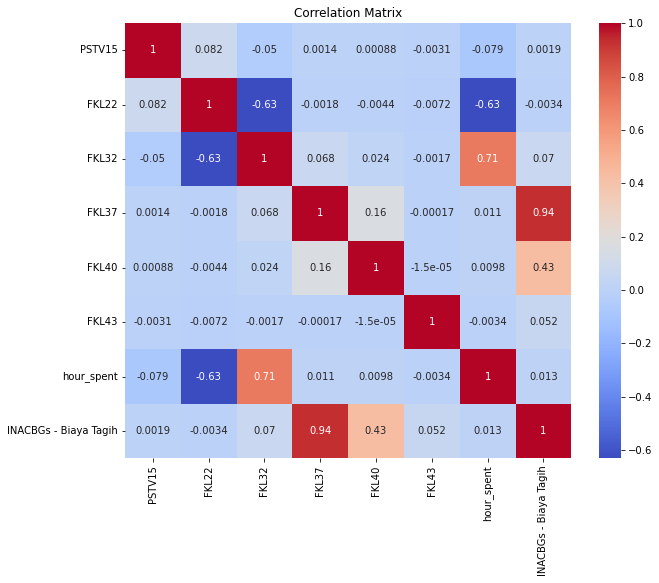

In [79]:
numeric_columns = fix_reduced_diagnosis.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Feature Engineering

In [80]:
numeric_columns

,PSTV15,FKL22,FKL32,FKL37,FKL40,FKL43,hour_spent,INACBGs - Biaya Tagih
41841,6.72,23,564300.00,0.00,0.00,0.00,0.00,0.00
41842,6.72,27,188900.00,0.00,0.00,0.00,0.00,0.00
41843,8.28,10,3309500.00,0.00,0.00,0.00,48.00,0.00
41844,8.25,20,20280400.00,0.00,0.00,0.00,96.00,0.00
41845,13.13,44,192400.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...
274505,7.99,44,183500.00,0.00,0.00,0.00,0.00,0.00
274506,13.29,44,165400.00,0.00,0.00,0.00,0.00,0.00
274507,11.46,44,185500.00,0.00,0.00,0.00,0.00,0.00
274508,13.37,10,5873300.00,0.00,0.00,0.00,48.00,0.00


## Remove Column That have low correlation with all column

In [81]:
fix_reduced_diagnosis.drop(['PSTV15','FKL43'],axis=1,inplace=True)

##  Preprocess Column with their respective value 

### FKL13

In [82]:
fix_reduced_diagnosis['FKL13'].value_counts()

Kelas 3    151539
Kelas 1     22661
Kelas 2     14003
Name: FKL13, dtype: int64

In [83]:
mapping = {'Kelas 1': 1, 'Kelas 2': 2, 'Kelas 3': 3}
fix_reduced_diagnosis['FKL13'] = fix_reduced_diagnosis['FKL13'].replace(mapping)
fix_reduced_diagnosis['FKL13'].value_counts()

3    151539
1     22661
2     14003
Name: FKL13, dtype: int64

### FKL23

In [84]:
fix_reduced_diagnosis['FKL23'].value_counts()

Rawat Jalan                        126576
Ringan (rawat inap keparahan 1)     38881
Sedang (rawat inap keparahan 2)     16784
Berat (rawat inap keparahan 3)       5962
Name: FKL23, dtype: int64

In [85]:
mapping = {str(fix_reduced_diagnosis['FKL23'].value_counts().index[0]): 0, str(fix_reduced_diagnosis['FKL23'].value_counts().index[1]): 1, str(fix_reduced_diagnosis['FKL23'].value_counts().index[2]): 2,str(fix_reduced_diagnosis['FKL23'].value_counts().index[3]): 3}
fix_reduced_diagnosis['FKL23'] = fix_reduced_diagnosis['FKL23'].replace(mapping)
fix_reduced_diagnosis['FKL23'].value_counts()

0    126576
1     38881
2     16784
3      5962
Name: FKL23, dtype: int64

## Preprocess Column - Sort Value and label encoding based highest count order

### FKL07

In [86]:
fix_reduced_diagnosis['FKL07'].value_counts()

Swasta                 83259
Pemerintah kab/kota    69903
Pemerintah provinsi    15530
TNI AD                  5473
Vertikal                4123
BUMN                    4009
POLRI                   3381
TNI AL                  1363
TNI AU                  1162
Name: FKL07, dtype: int64

In [87]:
value_counts = fix_reduced_diagnosis['FKL07'].value_counts().sort_values(ascending=False)
mapping = {value_counts.index[i]: i+1 for i in range(len(value_counts))}
fix_reduced_diagnosis['FKL07'] = fix_reduced_diagnosis['FKL07'].replace(mapping)
fix_reduced_diagnosis['FKL07'].value_counts()

1    83259
2    69903
3    15530
4     5473
5     4123
6     4009
7     3381
8     1363
9     1162
Name: FKL07, dtype: int64

### FKL08

In [88]:
fix_reduced_diagnosis['FKL08'].value_counts()

Rumah sakit     185548
Klinik Utama      2655
Name: FKL08, dtype: int64

In [89]:
value_counts = fix_reduced_diagnosis['FKL08'].value_counts().sort_values(ascending=False)
mapping = {value_counts.index[i]: i+1 for i in range(len(value_counts))}
fix_reduced_diagnosis['FKL08'] = fix_reduced_diagnosis['FKL08'].replace(mapping)
fix_reduced_diagnosis['FKL08'].value_counts()

1    185548
2      2655
Name: FKL08, dtype: int64

### FKL09

In [90]:
fix_reduced_diagnosis['FKL09'].value_counts()

RS Kelas C                      50615
RS Swasta Setara Type C         45535
RS Kelas B                      28946
RS Swasta Setara Type D         19238
RS Kelas D                      10402
RS Swasta Setara Type B          9739
RS Kelas A                       4745
RS TNI Polri Kelas III           4363
RS TNI Polri Kelas IV            3503
Khusus Mata                      3225
RS TNI Polri Kelas II            2697
Khusus Lain                      2147
Khusus Ibu dan Anak               925
Khusus Jiwa                       702
RS TNI Polri Kelas I              510
Khusus Bedah                      356
Khusus Paru                       176
Khusus Kusta                      103
Missing                            69
Khusus Stroke                      59
RS Swasta Setara Type A            57
RS Non Provider GawatDarurat       46
Khusus Jantung                     22
Khusus Hemodialisa                 10
Khusus Kanker Onkologi              9
Khusus Tulang                       4
Name: FKL09,

In [91]:
value_counts = fix_reduced_diagnosis['FKL09'].value_counts().sort_values(ascending=False)
mapping = {value_counts.index[i]: i+1 for i in range(len(value_counts))}
fix_reduced_diagnosis['FKL09'] = fix_reduced_diagnosis['FKL09'].replace(mapping)
fix_reduced_diagnosis['FKL09'].value_counts()

1     50615
2     45535
3     28946
4     19238
5     10402
6      9739
7      4745
8      4363
9      3503
10     3225
11     2697
12     2147
13      925
14      702
15      510
16      356
17      176
18      103
19       69
20       59
21       57
22       46
23       22
24       10
25        9
26        4
Name: FKL09, dtype: int64

### FKL10

In [92]:
fix_reduced_diagnosis['FKL10'].value_counts()

RJTL    126576
RITL     61627
Name: FKL10, dtype: int64

In [93]:
value_counts = fix_reduced_diagnosis['FKL10'].value_counts().sort_values(ascending=False)
mapping = {value_counts.index[i]: i+1 for i in range(len(value_counts))}
fix_reduced_diagnosis['FKL10'] = fix_reduced_diagnosis['FKL10'].replace(mapping)
fix_reduced_diagnosis['FKL10'].value_counts()

1    126576
2     61627
Name: FKL10, dtype: int64

### FKL11

In [94]:
fix_reduced_diagnosis['FKL11'].value_counts()

INT        103330
Missing     61632
MAT          6420
IGD          6371
BED          3808
SAR          1854
END          1236
UGD           745
IPD           534
DBM           445
JAN           386
ANA           230
IRM           172
PAR           165
FIS           153
ORT           127
GIZ           107
OBG            59
KLT            56
GER            49
GIG            48
THT            47
URO            34
LAI            23
LAB            18
INF            16
HDL            14
GIN            13
JIW            13
BTK            13
HEM            10
REM            10
KEM             8
SEM             7
BDP             7
IKA             7
BSY             5
ICU             4
RAT             3
BDM             3
OKM             3
RAD             3
ANT             2
GND             2
RHM             2
GAS             2
PUL             1
CAN             1
JWD             1
KDN             1
GPR             1
Name: FKL11, dtype: int64

In [95]:
value_counts = fix_reduced_diagnosis['FKL11'].value_counts().sort_values(ascending=False)
mapping = {value_counts.index[i]: i+1 for i in range(len(value_counts))}
fix_reduced_diagnosis['FKL11'] = fix_reduced_diagnosis['FKL11'].replace(mapping)
fix_reduced_diagnosis['FKL11'].value_counts()

1.00     103330
2.00      61632
3.00       6420
4.00       6371
5.00       3808
6.00       1854
7.00       1236
8.00        745
9.00        534
10.00       445
11.00       386
12.00       230
13.00       172
14.00       165
15.00       153
16.00       127
17.00       107
18.00        59
19.00        56
20.00        49
21.00        48
22.00        47
23.00        34
24.00        23
25.00        18
26.00        16
27.00        14
30.00        13
28.00        13
29.00        13
31.00        10
32.00        10
33.00         8
34.00         7
35.00         7
36.00         7
37.00         5
38.00         4
41.00         3
42.00         3
39.00         3
40.00         3
43.00         2
44.00         2
45.00         2
46.00         2
47.00         1
48.00         1
49.00         1
50.00         1
51.00         1
Name: FKL11, dtype: int64

### FKL12

In [96]:
fix_reduced_diagnosis['FKL12'].value_counts()

PBPU             64695
PPU              57563
Bukan pekerja    32430
PBI APBD         18682
PBI APBN         14833
Name: FKL12, dtype: int64

In [97]:
value_counts = fix_reduced_diagnosis['FKL12'].value_counts().sort_values(ascending=False)
mapping = {value_counts.index[i]: i+1 for i in range(len(value_counts))}
fix_reduced_diagnosis['FKL12'] = fix_reduced_diagnosis['FKL12'].replace(mapping)
fix_reduced_diagnosis['FKL12'].value_counts()

1    64695
2    57563
3    32430
4    18682
5    14833
Name: FKL12, dtype: int64

### FKL14

In [98]:
fix_reduced_diagnosis['FKL14'].value_counts()

Sehat           183070
Rujuk             2230
Meninggal         1587
Pulang Paksa       725
Tidak Tahu         591
Name: FKL14, dtype: int64

In [99]:
value_counts = fix_reduced_diagnosis['FKL14'].value_counts().sort_values(ascending=False)
mapping = {value_counts.index[i]: i+1 for i in range(len(value_counts))}
fix_reduced_diagnosis['FKL14'] = fix_reduced_diagnosis['FKL14'].replace(mapping)
fix_reduced_diagnosis['FKL14'].value_counts()

1    183070
2      2230
3      1587
4       725
5       591
Name: FKL14, dtype: int64

### FKL21

In [100]:
fix_reduced_diagnosis['FKL21'].value_counts()

Rawat Jalan Bukan Prosedur         116076
Rawat Inap Bukan Prosedur           56553
Prosedur Signifikan Rawat Jalan      8756
Prosedur Rawat Inap                  5073
Prosedur Besar Rawat Jalan           1744
Rawat Inap Kebidanan                    1
Name: FKL21, dtype: int64

In [101]:
value_counts = fix_reduced_diagnosis['FKL21'].value_counts().sort_values(ascending=False)
mapping = {value_counts.index[i]: i+1 for i in range(len(value_counts))}
fix_reduced_diagnosis['FKL21'] = fix_reduced_diagnosis['FKL21'].replace(mapping)
fix_reduced_diagnosis['FKL21'].value_counts()

1    116076
2     56553
3      8756
4      5073
5      1744
6         1
Name: FKL21, dtype: int64

### FKL25

In [102]:
fix_reduced_diagnosis['FKL25'].unique()

array(['KALIMANTAN UTARA', 'SUMATERA BARAT', 'KALIMANTAN TENGAH',
       'JAWA TIMUR', 'JAWA BARAT', 'LAMPUNG', 'BALI', 'DKI JAKARTA',
       'RIAU', 'JAWA TENGAH', 'NUSA TENGGARA TIMUR', 'SULAWESI SELATAN',
       'BENGKULU', 'DAERAH ISTIMEWA YOGYAKARTA', 'TIDAK DIRUJUK',
       'KEPULAUAN BANGKA BELITUNG', 'SULAWESI UTARA', 'KALIMANTAN TIMUR',
       'SUMATERA UTARA', 'ACEH', 'PAPUA', 'MALUKU UTARA',
       'SUMATERA SELATAN', 'BANTEN', 'NUSA TENGGARA BARAT',
       'SULAWESI TENGGARA', 'KALIMANTAN SELATAN', 'KALIMANTAN BARAT',
       'KEPULAUAN RIAU', 'MALUKU', 'SULAWESI BARAT', 'SULAWESI TENGAH',
       'GORONTALO', 'PAPUA BARAT', 'JAMBI', 'TIDAK TERDEFINISI'],
      dtype=object)

In [103]:
fix_reduced_diagnosis.drop('FKL25',axis=1,inplace=True)

### FKL28

In [104]:
fix_reduced_diagnosis['FKL28'].value_counts()

Puskesmas         77125
Rumah sakit       53638
Klinik Pratama    30932
Dokter Umum       20987
BUKAN RUJUKAN      4493
Klinik Utama        937
Lain-lain            29
Dokter gigi          24
Apotik               20
MISSING              10
Laboratorium          4
Pemerintah            3
Optik                 1
Name: FKL28, dtype: int64

In [105]:
value_counts = fix_reduced_diagnosis['FKL28'].value_counts().sort_values(ascending=False)
mapping = {value_counts.index[i]: i+1 for i in range(len(value_counts))}
fix_reduced_diagnosis['FKL28'] = fix_reduced_diagnosis['FKL28'].replace(mapping)
fix_reduced_diagnosis['FKL28'].value_counts()

1     77125
2     53638
3     30932
4     20987
5      4493
6       937
7        29
8        24
9        20
10       10
11        4
12        3
13        1
Name: FKL28, dtype: int64

### FKL29

In [106]:
fix_reduced_diagnosis['FKL29'].value_counts()

NON RAWAT INAP               52073
KLINIK NON RAWAT INAP        28255
RAWAT INAP                   25059
DOKTER PRAKTER PERORANGAN    20983
RS SWASTA SETARA TYPE C      13044
RS KELAS C                   12758
RS KELAS B                   10415
RS SWASTA SETARA TYPE D       5961
BUKAN RUJUKAN                 4493
RS SWASTA SETARA TYPE B       3683
KLINIK RAWAT INAP             2626
RS KELAS D                    1958
RS KELAS A                    1910
RS TNI POLRI KELAS III        1148
RS TNI POLRI KELAS IV          969
KHUSUS LAIN                    743
RS TNI POLRI KELAS II          736
KHUSUS MATA                    436
RS TNI POLRI KELAS I           250
KHUSUS JIWA                    170
KHUSUS IBU DAN ANAK            113
KHUSUS PARU                    107
RS KELAS D PRATAMA              51
KHUSUS BEDAH                    50
KHUSUS STROKE                   37
RS SWASTA SETARA TYPE A         31
PPK TIDAK DITUNJUK              25
DOKTER GIGI                     24
KHUSUS KUSTA        

In [107]:
value_counts = fix_reduced_diagnosis['FKL29'].value_counts().sort_values(ascending=False)
mapping = {value_counts.index[i]: i+1 for i in range(len(value_counts))}
fix_reduced_diagnosis['FKL29'] = fix_reduced_diagnosis['FKL29'].replace(mapping)
fix_reduced_diagnosis['FKL29'].value_counts()

1     52073
2     28255
3     25059
4     20983
5     13044
6     12758
7     10415
8      5961
9      4493
10     3683
11     2626
12     1958
13     1910
14     1148
15      969
16      743
17      736
18      436
19      250
20      170
21      113
22      107
23       51
24       50
25       37
26       31
27       25
28       24
29       20
30       16
31       13
32       11
33       10
34        5
35        5
36        4
37        4
38        3
39        2
40        1
41        1
Name: FKL29, dtype: int64

## Preprocess Column - Get each of tingkat keparahan (YY-09-III) on last digit (III)

In [108]:
def convert_value(x):
    parts = x.split('-')
    if len(parts) > 1:
        last_part = parts[-1]
        return mapping.get(last_part, 0)
    else:
        return mapping.get(x, 0)

### FKL35

In [109]:
fix_reduced_diagnosis['FKL35'].value_counts()

Tidak ada    188060
YY-09-III        78
YY-10-III        59
YY-02-III         3
YY-13-III         2
YY-01-II          1
Name: FKL35, dtype: int64

In [110]:
mapping = {
    'III': 3,
    'II': 2,
    'I': 1,
    'Tidak ada': 0
}

fix_reduced_diagnosis['FKL35'] = fix_reduced_diagnosis['FKL35'].map(convert_value)
fix_reduced_diagnosis['FKL35'].value_counts()

0    188060
3       142
2         1
Name: FKL35, dtype: int64

### FKL38

In [111]:
fix_reduced_diagnosis['FKL38'].value_counts()

Tidak ada    188202
RR-04-III         1
Name: FKL38, dtype: int64

In [112]:
mapping = {
    'III': 3,
    'II': 2,
    'I': 1,
    'Tidak ada': 0
}

fix_reduced_diagnosis['FKL38'] = fix_reduced_diagnosis['FKL38'].map(convert_value)
fix_reduced_diagnosis['FKL38'].value_counts()

0    188202
3         1
Name: FKL38, dtype: int64

### FKL41

In [113]:
fix_reduced_diagnosis['FKL41'].value_counts()

Tidak ada    188194
II-02-III         7
II-01-III         2
Name: FKL41, dtype: int64

In [114]:
mapping = {
    'III': 3,
    'II': 2,
    'I': 1,
    'Tidak ada': 0
}

fix_reduced_diagnosis['FKL41'] = fix_reduced_diagnosis['FKL41'].map(convert_value)
fix_reduced_diagnosis['FKL41'].value_counts()

0    188194
3         9
Name: FKL41, dtype: int64

## Preprocess Column - Make identified as integer dtype

In [115]:
fix_reduced_diagnosis['identified'] = fix_reduced_diagnosis['identified'].astype(int)

## Validate our preprocessing column

In [116]:
fix_reduced_diagnosis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188203 entries, 41841 to 274509
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   FKL07                  188203 non-null  int64  
 1   FKL08                  188203 non-null  int64  
 2   FKL09                  188203 non-null  int64  
 3   FKL10                  188203 non-null  int64  
 4   FKL11                  188201 non-null  float64
 5   FKL12                  188203 non-null  int64  
 6   FKL13                  188203 non-null  int64  
 7   FKL14                  188203 non-null  int64  
 8   FKL21                  188203 non-null  int64  
 9   FKL22                  188203 non-null  int64  
 10  FKL23                  188203 non-null  int64  
 11  FKL28                  188203 non-null  int64  
 12  FKL29                  188203 non-null  int64  
 13  FKL32                  188203 non-null  float64
 14  FKL35                  188203 no

In [117]:
fix_reduced_diagnosis.isna().sum()

FKL07                    0
FKL08                    0
FKL09                    0
FKL10                    0
FKL11                    2
FKL12                    0
FKL13                    0
FKL14                    0
FKL21                    0
FKL22                    0
FKL23                    0
FKL28                    0
FKL29                    0
FKL32                    0
FKL35                    0
FKL37                    0
FKL38                    0
FKL40                    0
FKL41                    0
hour_spent               0
identified               0
INACBGs - Biaya Tagih    0
dtype: int64

In [118]:
fix_reduced_diagnosis = fix_reduced_diagnosis.dropna()
fix_reduced_diagnosis.isna().sum()

FKL07                    0
FKL08                    0
FKL09                    0
FKL10                    0
FKL11                    0
FKL12                    0
FKL13                    0
FKL14                    0
FKL21                    0
FKL22                    0
FKL23                    0
FKL28                    0
FKL29                    0
FKL32                    0
FKL35                    0
FKL37                    0
FKL38                    0
FKL40                    0
FKL41                    0
hour_spent               0
identified               0
INACBGs - Biaya Tagih    0
dtype: int64

In [119]:
fixed_df_enc = fix_reduced_diagnosis

# Correlation Matrix

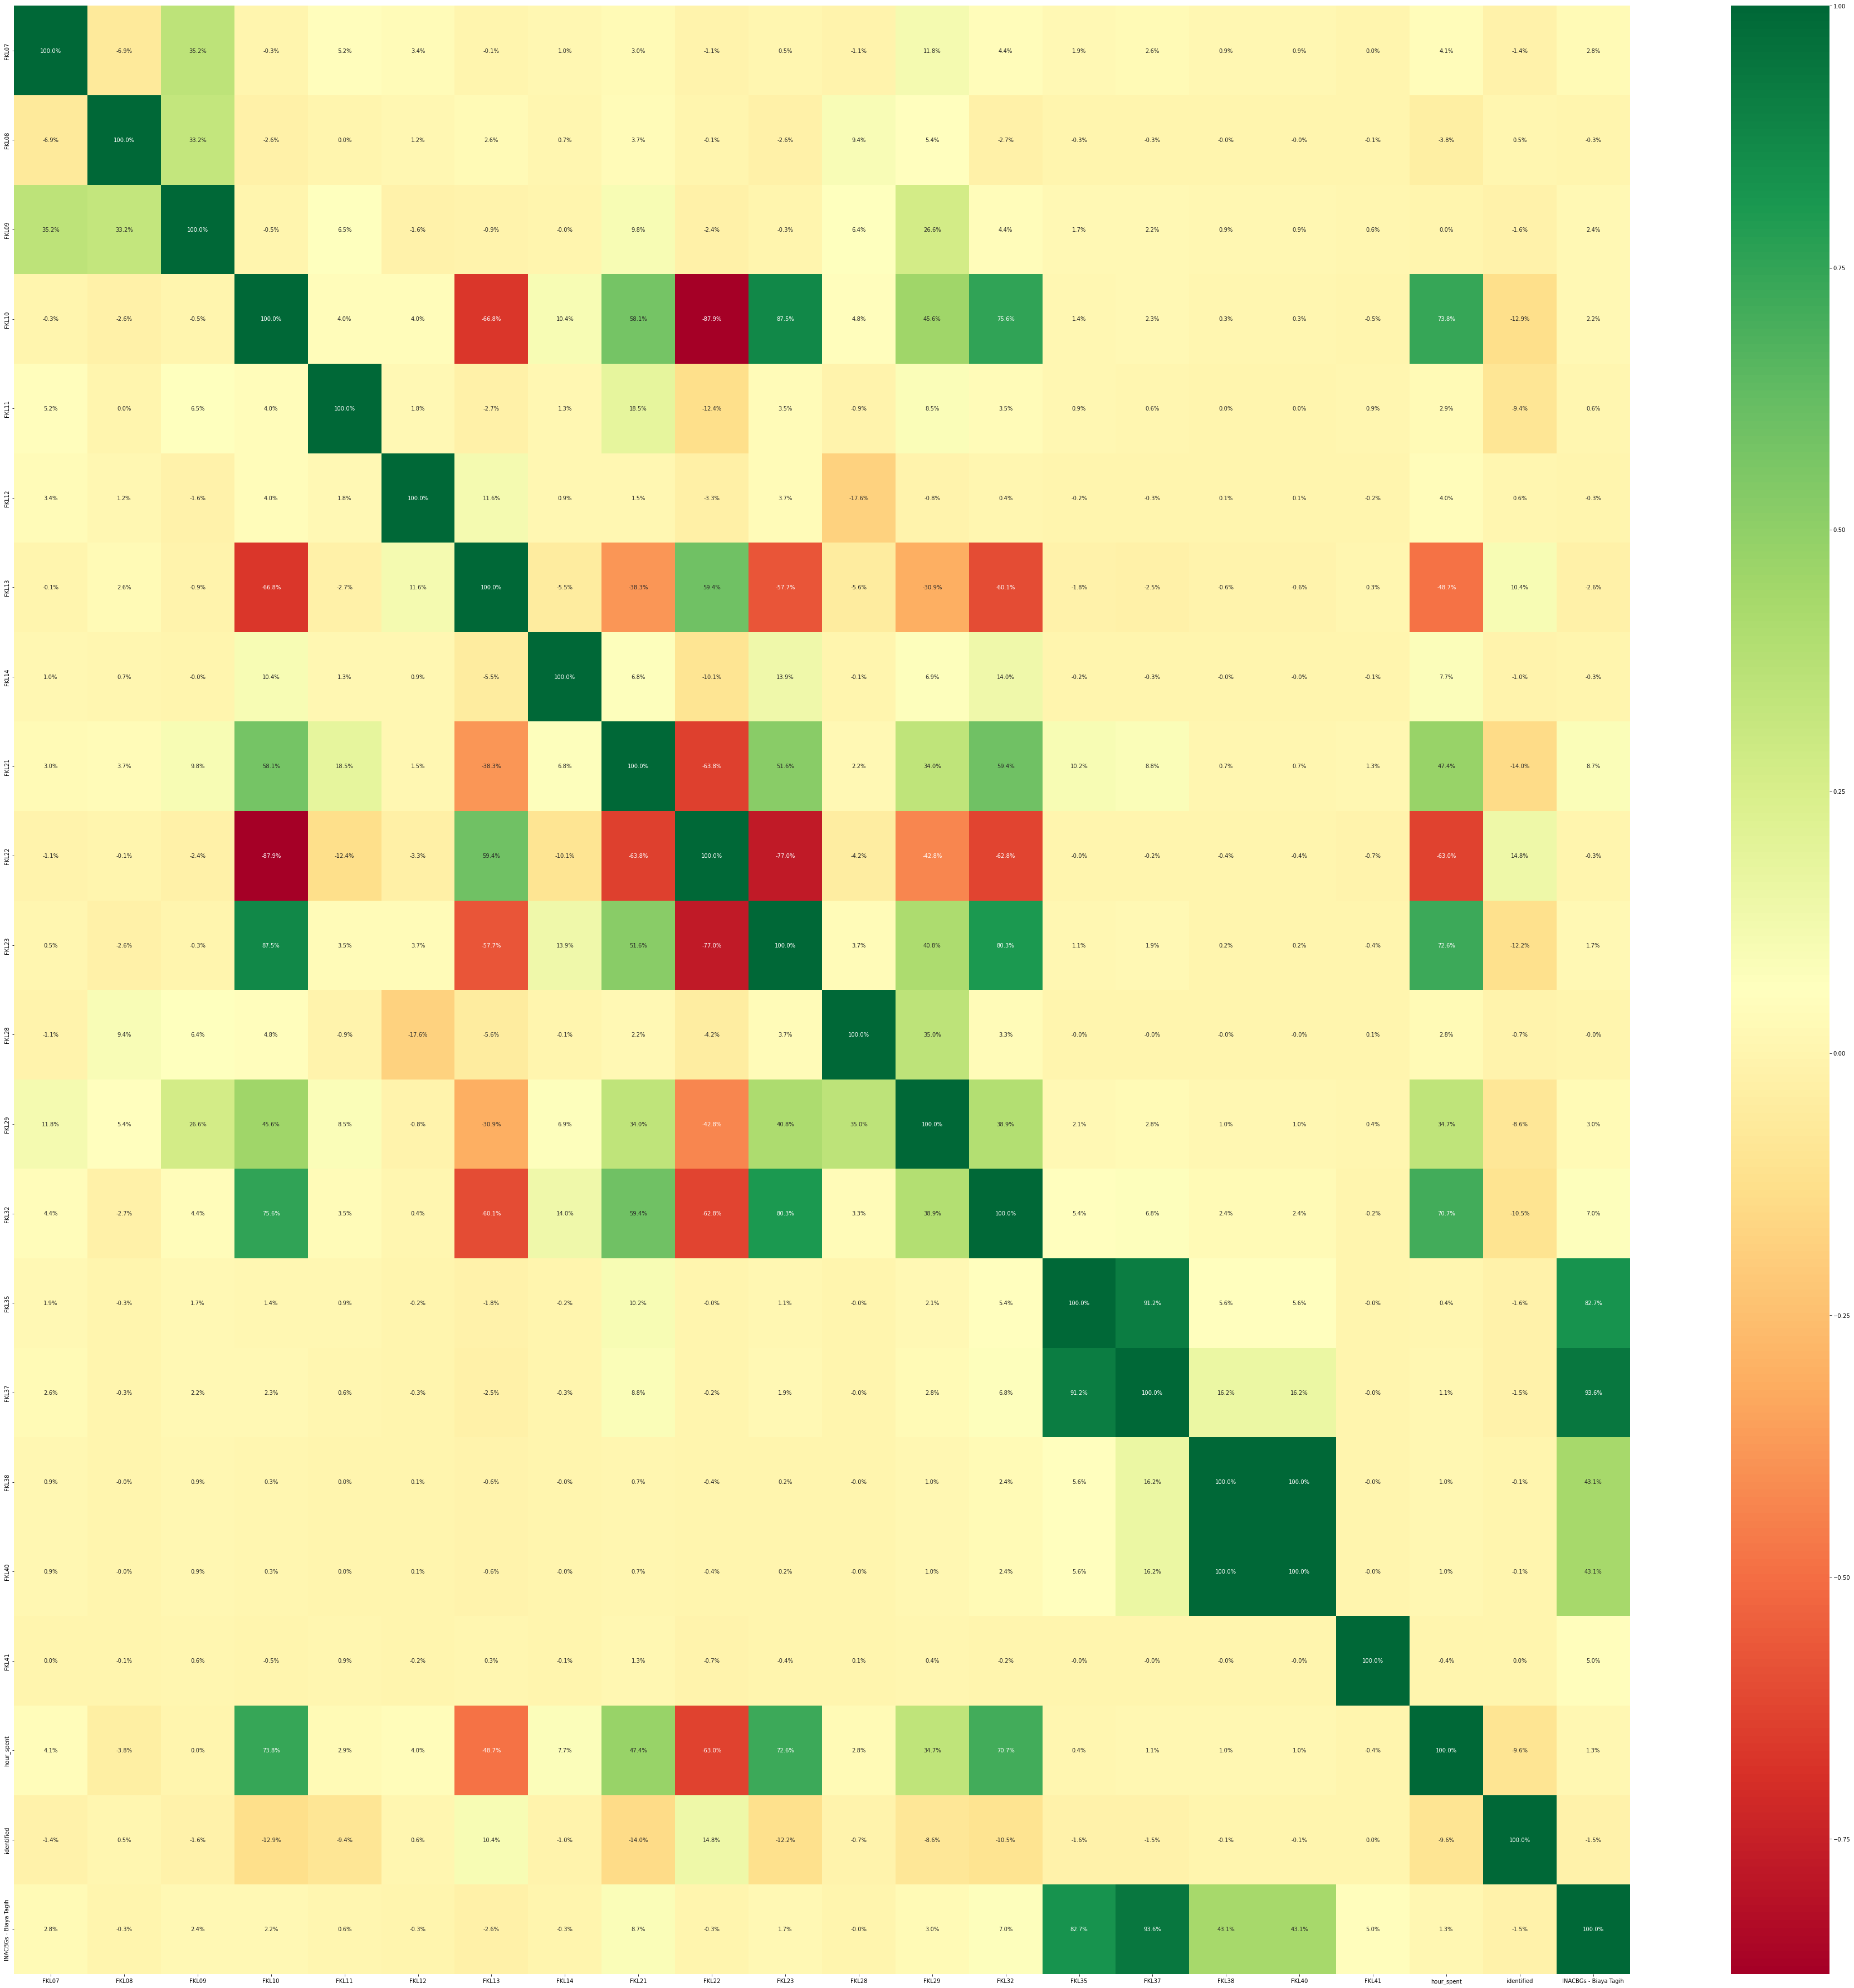

In [122]:
corr = fixed_df_enc.corr()
plt.figure(figsize=(65,65))
color = plt.get_cmap('RdYlGn')   # default color
color.set_bad('lightblue')    # if the value is bad the color would be lightblue instead of white
sns.heatmap(corr,annot=True,fmt=".1%", cmap=color)

plt.show()

In [124]:
filtered_df = fixed_df_enc
df_fix = filtered_df
df_fix.columns

Index(['FKL07', 'FKL08', 'FKL09', 'FKL10', 'FKL11', 'FKL12', 'FKL13', 'FKL14',
       'FKL21', 'FKL22', 'FKL23', 'FKL28', 'FKL29', 'FKL32', 'FKL35', 'FKL37',
       'FKL38', 'FKL40', 'FKL41', 'hour_spent', 'identified',
       'INACBGs - Biaya Tagih'],
      dtype='object')

# Split Dataset

In [125]:
from sklearn.model_selection import train_test_split
y = df_fix['FKL32']
x = df_fix.drop('FKL32',axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

# Scaling

In [126]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_train

array([[-0.69231465, -0.11930648,  0.18576502, ...,  0.1672265 ,
         1.19947881, -0.02565819],
       [ 1.33111381, -0.11930648,  2.55855736, ..., -0.52032972,
        -0.57012649, -0.02565819],
       [-0.0178385 , -0.11930648, -0.83114598, ..., -0.52032972,
        -0.57012649, -0.02565819],
       ...,
       [-0.0178385 , -0.11930648, -0.15320532, ...,  0.85478271,
        -0.57012649, -0.02565819],
       [-0.69231465, -0.11930648, -0.49217565, ..., -0.52032972,
         1.19947881, -0.02565819],
       [-0.69231465, -0.11930648, -0.49217565, ..., -0.52032972,
        -0.57012649, -0.02565819]])

In [127]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_test=sc.fit_transform(X_test)
X_test

array([[-0.01543117, -0.12087001, -0.14898896, ..., -0.49519417,
         1.19142483, -0.02246887],
       [-0.69557708, -0.12087001,  0.19288457, ..., -0.49519417,
         1.19142483, -0.02246887],
       [ 0.66471474, -0.12087001, -0.14898896, ..., -0.49519417,
        -0.57015982, -0.02246887],
       ...,
       [-0.01543117, -0.12087001, -0.83273602, ..., -0.49519417,
         1.19142483, -0.02246887],
       [-0.01543117, -0.12087001, -0.83273602, ..., -0.49519417,
        -0.57015982, -0.02246887],
       [-0.01543117, -0.12087001,  0.5347581 , ..., -0.49519417,
        -0.57015982, -0.02246887]])

In [128]:
sc.fit((Y_train.to_numpy().reshape(-1, 1)))
Y_train = sc.transform(Y_train.to_numpy().reshape(-1, 1)).flatten()
Y_train

array([ 0.77665716, -0.54149711, -0.54323614, ...,  0.42828161,
       -0.54323614, -0.53085305])

In [129]:
sc.fit((Y_test.to_numpy().reshape(-1, 1)))
Y_test = sc.transform(Y_test.to_numpy().reshape(-1, 1)).flatten()
Y_test

array([-0.52271125, -0.52999672, -0.53584898, ..., -0.53059389,
       -0.53059389, -0.48816498])

# HyperParameter Tuning

In [130]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_percentage_error

def rmse_score(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

## Linear Regression

In [131]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
grid_space = {
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

grid = GridSearchCV(lr, param_grid=grid_space, cv=3, scoring=make_scorer(rmse_score, greater_is_better=False))
model_grid = grid.fit(X_train, Y_train)

print('Best hyperparameters for LinearRegression are: ' + str(model_grid.best_params_))
print('Best score is: ' + str(-model_grid.best_score_))
best_lr_params = model_grid.best_params_

Best hyperparameters for LinearRegression are: {'fit_intercept': False, 'normalize': True}
Best score is: 0.8514193450061116


## Decision Tree Regression

In [133]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeRegressor()
grid_space = {
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid = GridSearchCV(dt, grid_space, cv=3, scoring=make_scorer(rmse_score, greater_is_better=False))
model_grid = grid.fit(X_train, Y_train)

print('Best hyperparameters for DecisionTreeRegression are: ' + str(model_grid.best_params_))
print('Best score is: ' + str(-model_grid.best_score_))
best_dt_params = model_grid.best_params_

Best hyperparameters for DecisionTreeRegression are: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 5}
Best score is: 0.273642840160692


## Random Forest Regression

In [134]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()
grid_space = {
    'n_estimators': [10, 100, 200],
    'max_depth': [3, 5, 10, None],
    'max_features': [1, 3, 5, 7],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [1, 2, 3]
}

grid = GridSearchCV(rf, param_grid=grid_space, cv=3, scoring=make_scorer(rmse_score, greater_is_better=False))
model_grid = grid.fit(X_train, Y_train)

print('Best hyperparameters for Random Forest Regression are: ' + str(model_grid.best_params_))
print('Best score (negative mean squared error) is: ' + str(-model_grid.best_score_))
best_rf_params = model_grid.best_params_

Best hyperparameters for Random Forest Regression are: {'max_depth': None, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score (negative mean squared error) is: 0.23428844627778203


## Support Vector Regression

In [135]:
# from sklearn.svm import SVR
# from sklearn.model_selection import GridSearchCV

# svr = SVR()
# grid_space = {
#     'kernel': ['linear', 'rbf', 'poly'],
#     'C': [0.1, 1, 10],
#     'epsilon': [0.01, 0.1, 1],
#     'gamma': ['scale', 'auto']
# }

# grid = GridSearchCV(svr, param_grid=grid_space, cv=3, scoring=make_scorer(rmse_score, greater_is_better=False))
# model_grid = grid.fit(x, y)

# print('Best hyperparameters for Support Vector Regression are: ' + str(model_grid.best_params_))
# print('Best score (negative mean squared error) is: ' + str(model_grid.best_score_))
# best_svr_params = model_grid.best_params_


## Lasso Regression

In [136]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
grid_space = {
    'alpha': [0.01, 0.1, 1, 10],
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'max_iter': [1000, 2000, 5000]
}

grid = GridSearchCV(lasso, param_grid=grid_space, cv=3, scoring=make_scorer(rmse_score, greater_is_better=False))
model_grid = grid.fit(X_train, Y_train)

print('Best hyperparameters for Lasso Regression are: ' + str(model_grid.best_params_))
print('Best score (negative mean squared error) is: ' + str(model_grid.best_score_))
best_lasso_params = model_grid.best_params_

Best hyperparameters for Lasso Regression are: {'alpha': 0.01, 'fit_intercept': False, 'max_iter': 1000, 'normalize': True}
Best score (negative mean squared error) is: -0.5006882526067872


## CatBoost Regression

In [137]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [138]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

catboost = CatBoostRegressor()

grid_space = {
    'depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.5],
    'iterations': [100, 200, 300]
}

grid = GridSearchCV(catboost, param_grid=grid_space, cv=3, scoring=make_scorer(rmse_score, greater_is_better=False))
model_grid = grid.fit(X_train, Y_train)

print('Best hyperparameters for Catboost Regression are: ' + str(model_grid.best_params_))
print('Best score is: ' + str(-model_grid.best_score_))
best_catboost_params = model_grid.best_params_

0:	learn: 0.9834340	total: 144ms	remaining: 14.3s
1:	learn: 0.9755960	total: 149ms	remaining: 7.28s
2:	learn: 0.9678321	total: 152ms	remaining: 4.91s
3:	learn: 0.9601707	total: 156ms	remaining: 3.73s
4:	learn: 0.9526496	total: 159ms	remaining: 3.03s
5:	learn: 0.9451713	total: 163ms	remaining: 2.55s
6:	learn: 0.9377436	total: 166ms	remaining: 2.21s
7:	learn: 0.9304136	total: 170ms	remaining: 1.95s
8:	learn: 0.9231843	total: 173ms	remaining: 1.75s
9:	learn: 0.9160215	total: 177ms	remaining: 1.59s
10:	learn: 0.9089652	total: 180ms	remaining: 1.46s
11:	learn: 0.9019953	total: 184ms	remaining: 1.35s
12:	learn: 0.8950726	total: 187ms	remaining: 1.25s
13:	learn: 0.8882351	total: 191ms	remaining: 1.17s
14:	learn: 0.8814741	total: 194ms	remaining: 1.1s
15:	learn: 0.8748290	total: 197ms	remaining: 1.03s
16:	learn: 0.8682329	total: 201ms	remaining: 981ms
17:	learn: 0.8617424	total: 204ms	remaining: 928ms
18:	learn: 0.8553010	total: 207ms	remaining: 884ms
19:	learn: 0.8489291	total: 211ms	remainin

## LightGBM Regression

In [139]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [140]:
""" import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

lgbm = lgb.LGBMRegressor()
grid_space = {
    'boosting_type': ['gbdt', 'dart', 'goss', 'rf'],
    'num_leaves': [10, 20, 30],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0.0, 0.1, 0.5],
    'reg_lambda': [0.0, 0.1, 0.5]
}

grid = GridSearchCV(lgbm, param_grid=grid_space, cv=3, scoring=make_scorer(rmse_score, greater_is_better=False))
model_grid = grid.fit(X_train, Y_train)

print('Best hyperparameters for LGBM Regression are: ' + str(model_grid.best_params_))
print('Best score is: ' + str(-model_grid.best_score_))
best_lr_params = model_grid.best_params_ """

" import lightgbm as lgb\nfrom sklearn.model_selection import GridSearchCV\n\nlgbm = lgb.LGBMRegressor()\ngrid_space = {\n    'boosting_type': ['gbdt', 'dart', 'goss', 'rf'],\n    'num_leaves': [10, 20, 30],\n    'learning_rate': [0.1, 0.01, 0.001],\n    'n_estimators': [100, 200, 300],\n    'subsample': [0.8, 0.9, 1.0],\n    'colsample_bytree': [0.8, 0.9, 1.0],\n    'reg_alpha': [0.0, 0.1, 0.5],\n    'reg_lambda': [0.0, 0.1, 0.5]\n}\n\ngrid = GridSearchCV(lgbm, param_grid=grid_space, cv=3, scoring=make_scorer(rmse_score, greater_is_better=False))\nmodel_grid = grid.fit(X_train, Y_train)\n\nprint('Best hyperparameters for LGBM Regression are: ' + str(model_grid.best_params_))\nprint('Best score is: ' + str(-model_grid.best_score_))\nbest_lr_params = model_grid.best_params_ "

# Model Prediction

In [141]:
r2_scores = []
rmse_scores = []
model_names = []
mse_scores = []
mape_scores = []

## Linear Regression

In [142]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(**best_lr_params)
lr.fit(X_train, Y_train)
Y_pred_lr = lr.predict(X_test)
r2_scores.append(r2_score(Y_test, Y_pred_lr))
rmse_scores.append(np.sqrt(mean_squared_error(Y_test, Y_pred_lr)))
mse_scores.append(mean_squared_error(Y_test, Y_pred_lr))
mape_scores.append(mean_absolute_percentage_error(Y_test, Y_pred_lr))
model_names.append('Linear Regression')

## Decision Tree Regression

In [144]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(**best_dt_params)
dt.fit(X_train, Y_train)
Y_pred_dt = dt.predict(X_test)
r2_scores.append(r2_score(Y_test, Y_pred_dt))
rmse_scores.append(np.sqrt(mean_squared_error(Y_test, Y_pred_dt)))
mse_scores.append(mean_squared_error(Y_test, Y_pred_dt))
mape_scores.append(mean_absolute_percentage_error(Y_test, Y_pred_dt))
model_names.append('Decision Tree Regression')

## Random Forest Regression

In [145]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(**best_rf_params)
rf.fit(X_train, Y_train)
Y_pred_rf = rf.predict(X_test)
r2_scores.append(r2_score(Y_test, Y_pred_rf))
rmse_scores.append(np.sqrt(mean_squared_error(Y_test, Y_pred_rf)))
mse_scores.append(mean_squared_error(Y_test, Y_pred_rf))
mape_scores.append(mean_absolute_percentage_error(Y_test, Y_pred_rf))
model_names.append('RandomForest Regression')

## Support Vector Regression

In [146]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, Y_train)
Y_pred_svr = svr.predict(X_test)
r2_scores.append(r2_score(Y_test, Y_pred_svr))
rmse_scores.append(np.sqrt(mean_squared_error(Y_test, Y_pred_svr)))
mse_scores.append(mean_squared_error(Y_test, Y_pred_svr))
mape_scores.append(mean_absolute_percentage_error(Y_test, Y_pred_svr))
model_names.append('Support Vector Regression')

## Lasso Regression

In [152]:
from sklearn.linear_model import Lasso
lasso = Lasso(**best_lasso_params)
lasso.fit(X_train, Y_train)
Y_pred_lasso = lasso.predict(X_test)
r2_scores.append(r2_score(Y_test, Y_pred_lasso))
rmse_scores.append(np.sqrt(mean_squared_error(Y_test, Y_pred_lasso)))
mse_scores.append(mean_squared_error(Y_test, Y_pred_lasso))
mape_scores.append(mean_absolute_percentage_error(Y_test, Y_pred_lasso))
model_names.append('Lasso Regression')

## Catboost Regression

In [160]:
from catboost import CatBoostRegressor
catboost = CatBoostRegressor(**best_catboost_params)
catboost.fit(X_train, Y_train)
Y_pred_catboost = catboost.predict(X_test)
r2_scores.append(r2_score(Y_test, Y_pred_catboost))
rmse_scores.append(np.sqrt(mean_squared_error(Y_test, Y_pred_catboost)))
mse_scores.append(mean_squared_error(Y_test, Y_pred_catboost))
mape_scores.append(mean_absolute_percentage_error(Y_test, Y_pred_catboost))
model_names.append('Catboost Regression')

0:	learn: 0.9143686	total: 11.3ms	remaining: 3.39s
1:	learn: 0.8384923	total: 22.1ms	remaining: 3.29s
2:	learn: 0.7706579	total: 31.4ms	remaining: 3.11s
3:	learn: 0.7112968	total: 39.5ms	remaining: 2.92s
4:	learn: 0.6582824	total: 48.6ms	remaining: 2.87s
5:	learn: 0.6111940	total: 57.5ms	remaining: 2.82s
6:	learn: 0.5690951	total: 67ms	remaining: 2.8s
7:	learn: 0.5325077	total: 76.6ms	remaining: 2.8s
8:	learn: 0.5015691	total: 86.1ms	remaining: 2.78s
9:	learn: 0.4739412	total: 94.9ms	remaining: 2.75s
10:	learn: 0.4486950	total: 103ms	remaining: 2.71s
11:	learn: 0.4273934	total: 112ms	remaining: 2.68s
12:	learn: 0.4085357	total: 119ms	remaining: 2.63s
13:	learn: 0.3921269	total: 127ms	remaining: 2.6s
14:	learn: 0.3778440	total: 136ms	remaining: 2.58s
15:	learn: 0.3651835	total: 144ms	remaining: 2.56s
16:	learn: 0.3547136	total: 153ms	remaining: 2.54s
17:	learn: 0.3443884	total: 160ms	remaining: 2.51s
18:	learn: 0.3367343	total: 169ms	remaining: 2.5s
19:	learn: 0.3281961	total: 177ms	rem

## LGBM Regression

In [149]:
import lightgbm as lgb
lgbm = lgb.LGBMRegressor()
lgbm.fit(X_train, Y_train)
Y_pred_lgbm = lgbm.predict(X_test)
r2_scores.append(r2_score(Y_test, Y_pred_lgbm))
rmse_scores.append(np.sqrt(mean_squared_error(Y_test, Y_pred_lgbm)))
mse_scores.append(mean_squared_error(Y_test, Y_pred_lgbm))
mape_scores.append(mean_absolute_percentage_error(Y_test, Y_pred_lgbm))
model_names.append('LGBM Regression')

# Model Evaluation

In [161]:
data = {'Model': model_names, 'R2 Score': r2_scores, 'RMSE Score': rmse_scores, 'MSE Score': mse_scores,'MAPE Score': mape_scores}
df_evaluation = pd.DataFrame(data)
df_evaluation = df_evaluation.sort_values(by='RMSE Score', ascending=True)
df_evaluation

,Model,R2 Score,RMSE Score,MSE Score,MAPE Score
1,Decision Tree Regression,0.93,0.27,0.07,3.18
2,RandomForest Regression,0.91,0.31,0.09,3.71
3,Support Vector Regression,0.86,0.38,0.14,3.73
0,Linear Regression,0.76,0.49,0.24,3.11
5,Lasso Regression,0.75,0.50,0.25,3.45
6,Catboost Regression,0.39,0.78,0.61,13.37
4,LGBM Regression,-7.29,2.88,8.29,41.90


In [151]:
Y_test_reshaped = Y_test.reshape(-1, 1)
Y_test1 = sc.inverse_transform(Y_test_reshaped).flatten()

Y_pred_reshaped = Y_pred_lasso.reshape(-1, 1)
Y_pred1 = sc.inverse_transform(Y_pred_reshaped).flatten()

result_df = pd.DataFrame({'Actual Price': np.round(Y_test1, 0), 'Prediction Price': np.round(Y_pred1, 0)})
result_df['Difference'] = abs(result_df['Actual Price'] - result_df['Prediction Price'])
result_df.sort_values(by='Difference',ascending=False)


,Actual Price,Prediction Price,Difference
14234,92864200.00,11954454.00,80909746.00
9835,90970896.00,12347546.00,78623350.00
22533,92864200.00,18525990.00,74338210.00
11743,94602200.00,23615404.00,70986796.00
26918,71028096.00,13867642.00,57160454.00
...,...,...,...
7239,3996700.00,3996682.00,18.00
3216,3996700.00,3996682.00,18.00
510,3996700.00,3996682.00,18.00
21091,3996700.00,3996682.00,18.00
